In [1]:
!pip install optuna
!pip install optuna-integration[sklearn]
!pip install phik

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 383 kB 1.2 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97 kB 638 kB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 686 kB 1.0 MB/s eta 0:00:01


In [2]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.11.0


     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.6 MB 2.2 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 235 kB 51.5 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 301 kB 95.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error,
                             accuracy_score, roc_auc_score, confusion_matrix,
                             recall_score, precision_score, make_scorer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import (SelectKBest, mutual_info_regression,
                                       mutual_info_classif)
from optuna import distributions
from optuna.integration import OptunaSearchCV

from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error,
                             accuracy_score, roc_auc_score, confusion_matrix,
                             recall_score, precision_score, make_scorer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import (SelectKBest, mutual_info_regression,
                                       mutual_info_classif)
from optuna import distributions
from optuna.integration import OptunaSearchCV

from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [5]:
RANDOM_STATE = 42

# HR-–∞–Ω–∞–ª–∏—Ç–∏–∫–∏ –∫–æ–º–ø–∞–Ω–∏–∏ ¬´–†–∞–±–æ—Ç–∞ —Å –∑–∞–±–æ—Ç–æ–π¬ª

## –í–≤–µ–¥–µ–Ω–∏–µ

–ö–æ–º–ø–∞–Ω–∏—è ¬´–†–∞–±–æ—Ç–∞ —Å –∑–∞–±–æ—Ç–æ–π¬ª –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–∏–∑–Ω–µ—Å—É –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ —É—Å–ª—É–≥–∏, –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º. –û—Å–Ω–æ–≤–Ω–∞—è —Ü–µ–ª—å –ø—Ä–æ–µ–∫—Ç–∞ ‚Äî –ø–æ–º–æ—á—å –∫–æ–º–ø–∞–Ω–∏–∏ –±—ã—Å—Ç—Ä–µ–µ –∏ —Ç–æ—á–Ω–µ–µ –æ—Ç–≤–µ—á–∞—Ç—å –Ω–∞ –∫–ª—é—á–µ–≤—ã–µ –≤–æ–ø—Ä–æ—Å—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ–º –∫–∞–¥—Ä–∞–º–∏, –∏—Å–ø–æ–ª—å–∑—É—è –º–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ

–ö–æ–º–ø–∞–Ω–∏–∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞—Ö, –≤–∫–ª—é—á–∞—è —Å–ª–µ–¥—É—é—â–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:

+ –õ–∏—á–Ω—ã–µ –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤.

+ –£—Ä–æ–≤–µ–Ω—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π (–¥–æ–ª—è –æ—Ç 0 –¥–æ 1).

        + –ó–Ω–∞—á–µ–Ω–∏–µ 0 ‚Äî –ø–æ–ª–Ω–æ—Å—Ç—å—é –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω.
        + –ó–Ω–∞—á–µ–Ω–∏–µ 1 ‚Äî –ø–æ–ª–Ω–æ—Å—Ç—å—é —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω.

–£—Ä–æ–≤–µ–Ω—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ –±—ã–ª —Ä–∞—Å—Å—á–∏—Ç–∞–Ω –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–ø—Ä–æ—Å–Ω–∏–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –∑–∞–ø–æ–ª–Ω—è–ª–∏ –¥–ª—è –æ–±—Ä–∞—Ç–Ω–æ–π —Å–≤—è–∑–∏. –°–±–æ—Ä —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∏–∑-–∑–∞ –º–∞—Å—à—Ç–∞–±–æ–≤ –∫–æ–º–ø–∞–Ω–∏–∏ –∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –æ–±–µ—Å–ø–µ—á–∏—Ç—å –ø—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏–µ –æ–ø—Ä–æ—Å–∞ –≤—Å–µ–º–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º–∏.

**–ó–∞–¥–∞—á–∏ –ø—Ä–æ–µ–∫—Ç–∞**

1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

2. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞.


## –ü–ª–∞–Ω —Ä–∞–±–æ—Ç—ã

### –≠—Ç–∞–ø 1: –ó–∞–¥–∞—á–∞ 1. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞

1. **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É `train_job_satisfaction_rate.csv`
   - –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É: –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ `test_features.csv`, —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `test_target_job_satisfaction_rate.csv`

2. **–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –ò–∑—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
   - –í—ã–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö: –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤

3. **–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:**
   - –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
   - –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
   - –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ –≤—ã–±—Ä–æ—Å–æ–≤

4. **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –°–æ–∑–¥–∞—Ç—å –ø–∞–π–ø–ª–∞–π–Ω –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ

5. **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:**
   - –û–±—É—á–∏—Ç—å –º–∏–Ω–∏–º—É–º –¥–≤–µ –º–æ–¥–µ–ª–∏: –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –∏ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π
   - –ù–∞—Å—Ç—Ä–æ–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é —Å–µ—Ç–æ—á–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –∏–ª–∏ –¥—Ä—É–≥–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞
   - –í—ã–±—Ä–∞—Ç—å –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –ø–æ –º–µ—Ç—Ä–∏–∫–µ SMAPE (–¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å ‚â§15 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ)

6. **–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π:**
   - –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ –º–µ—Ç—Ä–∏–∫–∏ SMAPE
   - –°—Ä–∞–≤–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –∏ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à—É—é

7. **–í—ã–≤–æ–¥—ã:**
   - –°–¥–µ–ª–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–µ

### –≠—Ç–∞–ø 2: –ó–∞–¥–∞—á–∞ 2. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞

1. **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É `train_quit.csv`.
   - –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É: –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ `test_features.csv`, —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `test_target_quit.csv`.

2. **–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –ò–∑—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
   - –í—ã–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤

3. **–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:**
   - –ò–∑—É—á–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∏—Ö —Å–≤—è–∑—å —Å —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º `quit`
   - –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –ø–æ—Ä—Ç—Ä–µ—Ç "—É–≤–æ–ª–∏–≤—à–µ–≥–æ—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞":
     - –ê–Ω–∞–ª–∏–∑ –æ—Ç–¥–µ–ª–æ–≤, –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç–∏, –∑–∞—Ä–ø–ª–∞—Ç—ã –∏ –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤
   - –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ `job_satisfaction_rate` –¥–ª—è —É—à–µ–¥—à–∏—Ö –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤

4. **–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞:**
   - –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ –∏–∑ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–∏ –∫–∞–∫ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫

5. **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –°–æ–∑–¥–∞—Ç—å –ø–∞–π–ø–ª–∞–π–Ω –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 

6. **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:**
   - –û–±—É—á–∏—Ç—å –º–∏–Ω–∏–º—É–º —Ç—Ä–∏ –º–æ–¥–µ–ª–∏
   - –ù–∞—Å—Ç—Ä–æ–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –¥–≤—É—Ö –º–æ–¥–µ–ª–µ–π
   - –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–µ ROC-AUC (–¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å ‚â•0.91 –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ)

7. **–í—ã–≤–æ–¥—ã:**
   - –°–¥–µ–ª–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –≤—Ç–æ—Ä–æ–π –∑–∞–¥–∞—á–µ

### –≠—Ç–∞–ø 3: –û–±—â–∏–π –≤—ã–≤–æ–¥

1. **–û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á:**
   - –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤
   - –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤

2. **–û–ø–∏—Å–∞–Ω–∏–µ —ç—Ç–∞–ø–æ–≤ —Ä–∞–±–æ—Ç—ã:**
   - –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞, –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑
   - –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∏ –æ—Ü–µ–Ω–∫–∞ –∏—Ö –∫–∞—á–µ—Å—Ç–≤–∞
   - –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∏—Ç–æ–≥–æ–≤ –ø–µ—Ä–≤–æ–π –∑–∞–¥–∞—á–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –≤—Ç–æ—Ä–æ–π

3. **–í—ã–≤–æ–¥—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:**
   - –°—Ä–∞–≤–Ω–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π –∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ –∏—Ö –≤—ã–±–æ—Ä–∞
   - –ü—Ä–µ–¥–ª–æ–∂–∏—Ç—å –±–∏–∑–Ω–µ—Å—É —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –æ—Ç—Ç–æ–∫–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –∏ –ø–æ–≤—ã—à–µ–Ω–∏—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏

## –ó–∞–¥–∞—á–∞ 1: –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞

### –®–∞–≥ 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [7]:
train_data_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', index_col='id')
test_features_job = pd.read_csv('/datasets/test_features.csv', index_col='id')
test_target_job = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', index_col='id')

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è –ø–µ—Ä–≤—á–∏–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [8]:
datasets_str = ['train_data_job', 'test_features_job', 'test_target_job']
datasets = [train_data_job, test_features_job, test_target_job]

In [9]:
def data_info(dataset):
    print("–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞")
    display(dataset.head())
    print('\n\n–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è')
    dataset.info()
    print('-' * 50)
    print('\n\n')

In [10]:
for i, dataset in enumerate(datasets):
    print(datasets_str[i])
    data_info(dataset)

train_data_job
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
155278                   no                      1   24000   
653870                   no                      5   38400   
184592                   no                      2   12000   
171431                   no                      2   18000   
693419                   no                      3   22800   

        job_satisfaction_rate  
id                             
155278                   0.58  
653870                   0.76  
184592                   0.11  
171431                   0.37  
693419                   0.20



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
--------------------------------------------------



test_features_job
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
485046                   no                      5   28800  
686555                   no                      4   30000  
467458                   no                      4   19200  
418655                   no                      4   19200  
789145                   no                      5   40800



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
--------------------------------------------------



test_target_job
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


job_satisfaction_rate
id                           
130604                   0.74
825977                   0.75
418490                   0.60
555320                   0.72
826430                   0.08



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
--------------------------------------------------





#### –í—ã–≤–æ–¥

–î–∞–Ω–Ω—ã–µ –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –æ–ø–∏—Å–∞–Ω–∏—é

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏

–°—Ç–æ–ª–±—Ü—ã –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∞–º –∏ –Ω–µ —Ç—Ä–µ–±—É—é—Ç –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è

### –®–∞–≥ 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

#### –û–±—å–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü

In [11]:
datasets_str

['train_data_job', 'test_features_job', 'test_target_job']

–û–±—å–µ–¥–∏–Ω–∏–º –¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å–æ –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏

In [12]:
test_data_job = test_features_job.join(test_target_job, how = 'left')
test_data_job.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   

        job_satisfaction_rate  
id                             
485046                   0.79  
686555                   0.72  
467458                   0.64  
418655                   0.60  
789145                   0.75

In [13]:
# Check
test_target_job[test_target_job.index == 485046]

job_satisfaction_rate
id                           
485046                   0.79

In [14]:
test_data_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 220.8+ KB


–ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –ª–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏

In [15]:
train_data_job.describe()

employment_years  supervisor_evaluation        salary  \
count       4000.000000            4000.000000   4000.000000   
mean           3.718500               3.476500  33926.700000   
std            2.542513               1.008812  14900.703838   
min            1.000000               1.000000  12000.000000   
25%            2.000000               3.000000  22800.000000   
50%            3.000000               4.000000  30000.000000   
75%            6.000000               4.000000  43200.000000   
max           10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max                 1.000000

In [16]:
test_data_job.describe()

employment_years  supervisor_evaluation        salary  \
count       2000.000000            2000.000000   2000.000000   
mean           3.666500               3.526500  34066.800000   
std            2.537222               0.996892  15398.436729   
min            1.000000               1.000000  12000.000000   
25%            1.000000               3.000000  22800.000000   
50%            3.000000               4.000000  30000.000000   
75%            6.000000               4.000000  43200.000000   
max           10.000000               5.000000  96000.000000   

       job_satisfaction_rate  
count             2000.00000  
mean                 0.54878  
std                  0.22011  
min                  0.03000  
25%                  0.38000  
50%                  0.58000  
75%                  0.72000  
max                  1.00000

In [17]:
datasets_str = ['train_data_job', 'test_data_job']
datasets = [train_data_job, test_data_job]

–û–±—ä–µ–¥–∏–Ω–∏–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ, –¥–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –º–µ–∂–¥—É –¥–∞—Ç–∞—Å–µ—Ç–∞–º–∏ –Ω–µ—Ç —Å–µ—Ä—å—ë–∑–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π

In [18]:
all_data = pd.concat([train_data_job, test_data_job], axis=0)
all_data.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
155278                   no                      1   24000   
653870                   no                      5   38400   
184592                   no                      2   12000   
171431                   no                      2   18000   
693419                   no                      3   22800   

        job_satisfaction_rate  
id                             
155278                   0.58  
653870                   0.76  
184592                   0.11  
171431                   0.37  
693419                   0.20

#### –ü–æ–∏—Å–∫ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [19]:
string_columns = all_data.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(all_data[col].unique())
    print()

dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan ' ']

level
['junior' 'middle' 'sinior' nan]

workload
['medium' 'high' 'low' ' ']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']



In [20]:
all_data[all_data['dept'] == ' ']

dept   level workload  employment_years last_year_promo  \
id                                                               
822186       middle   medium                 3              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
822186                   no                      4   38400   

        job_satisfaction_rate  
id                             
822186                   0.64

In [21]:
all_data[all_data['workload'] == ' ']

dept   level workload  employment_years last_year_promo  \
id                                                                     
590867  marketing  junior                          4              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
590867                   no                      4   28800   

        job_satisfaction_rate  
id                             
590867                   0.79

–ó–∞–º–µ–Ω–∏–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏ –Ω–∞ Nan

In [22]:
all_data.loc[all_data['dept'] == ' ', 'dept'] = np.nan
all_data.loc[all_data['workload'] == ' ', 'workload'] = np.nan

In [23]:
all_data.loc[all_data['level'] == 'sinior', 'level'] = 'senior'

In [24]:
#Check
string_columns = all_data.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(all_data[col].unique())
    print()

dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

level
['junior' 'middle' 'senior' nan]

workload
['medium' 'high' 'low' nan]

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']



In [25]:
all_data.loc[all_data['dept'] == 'sinior', 'dept'] = 'senior'

–ù–∞–π–¥–µ–º —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã

In [26]:
all_data.duplicated().sum()

528

–£–¥–∞–ª–∏–º –∏—Ö

In [27]:
all_data.drop_duplicates(inplace = True)
all_data.duplicated().sum()

0

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 155278 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   5463 non-null   object 
 1   level                  5467 non-null   object 
 2   workload               5471 non-null   object 
 3   employment_years       5472 non-null   int64  
 4   last_year_promo        5472 non-null   object 
 5   last_year_violations   5472 non-null   object 
 6   supervisor_evaluation  5472 non-null   int64  
 7   salary                 5472 non-null   int64  
 8   job_satisfaction_rate  5472 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 427.5+ KB


#### –í—ã–≤–æ–¥

–í—ã–ø–æ–ª–Ω–µ–Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–î–∞–Ω–Ω—ã–µ –æ–±—å–µ–¥–∏–Ω–µ–Ω—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É

–ò—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –æ—à–∏–±–∫–∏ –≤ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö 

–î—É–±–ª–∏–∫–∞—Ç—ã —É–¥–∞–ª–µ–Ω—ã

### –®–∞–≥ 3. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [29]:
all_data[all_data.index == 485046]
all_data.reset_index(inplace = True)
all_data[all_data['id'] == 485046]

id       dept   level workload  employment_years last_year_promo  \
3755  485046  marketing  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary  \
3755                   no                      5   28800   

      job_satisfaction_rate  
3755                   0.79

–û–±—Ä–∞—Ç–Ω–æ —Ä–∞–∑–¥–µ–ª–∏–º —Ç–µ—Å—Ç–æ–≤—É—é –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫–∏

–í—Å–µ —Å—Ç—Ä–æ–∫–∏ –Ω–∏–∂–µ –∏–Ω–¥–µ–∫—Å–∞ `485046` –æ—Ç–Ω–æ—Å—Ç—è—Å—è –∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –≤—ã–±–æ—Ä–∫–µ

In [30]:
# –ù–∞—Ö–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å —Å—Ç—Ä–æ–∫–∏ —Å id == 485046
split_index = all_data[all_data['id'] == 485046].index[0]

# –î–∞–Ω–Ω—ã–µ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
train_data_job = all_data.loc[:split_index - 1]

# –î–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_data_job = all_data.loc[split_index:]

In [31]:
train_data_job.set_index('id', inplace = True)
display(train_data_job.head())
test_data_job.set_index('id', inplace = True)
test_data_job.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
155278                   no                      1   24000   
653870                   no                      5   38400   
184592                   no                      2   12000   
171431                   no                      2   18000   
693419                   no                      3   22800   

        job_satisfaction_rate  
id                             
155278                   0.58  
653870                   0.76  
184592                   0.11  
171431                   0.37  
693419                   0.20

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
429973  purchasing  middle   medium                 6              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
429973                   no                      3   42000   

        job_satisfaction_rate  
id                             
485046                   0.79  
467458                   0.64  
418655                   0.60  
789145                   0.75  
429973                   0.67

#### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö


–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è employment_years (test):
1     377
2     297
3     222
4     180
5     164
7     163
6     131
8      85
9      65
10     33
Name: employment_years, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
1     21.956902
2     17.297612
3     12.929528
4     10.483401
5      9.551543
7      9.493302
6      7.629586
8      4.950495
9      3.785673
10     1.921957
Name: employment_years, dtype: float64


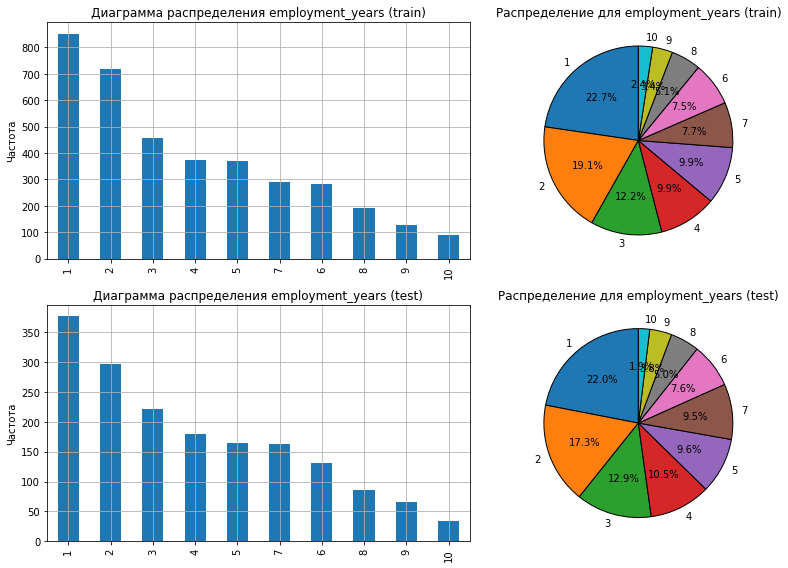


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è supervisor_evaluation (test):
4    684
3    498
5    259
2    189
1     87
Name: supervisor_evaluation, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
4    39.836925
3    29.004077
5    15.084450
2    11.007571
1     5.066977
Name: supervisor_evaluation, dtype: float64


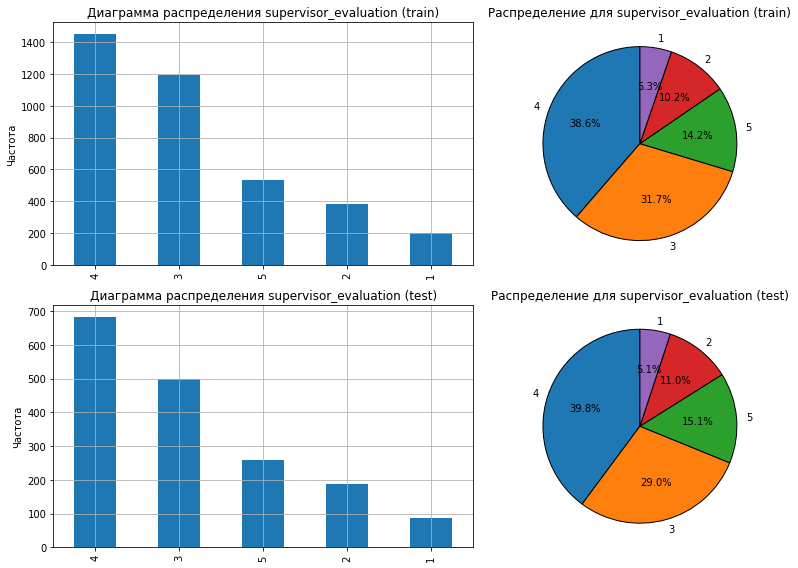


-------------------
salary
count     3755.000000
mean     34457.416778
std      15050.643870
min      12000.000000
25%      22800.000000
50%      31200.000000
75%      44400.000000
max      98400.000000
Name: salary, dtype: float64
count     1717.000000
mean     35521.956902
std      15754.893091
min      12000.000000
25%      24000.000000
50%      31200.000000
75%      45600.000000
max      96000.000000
Name: salary, dtype: float64


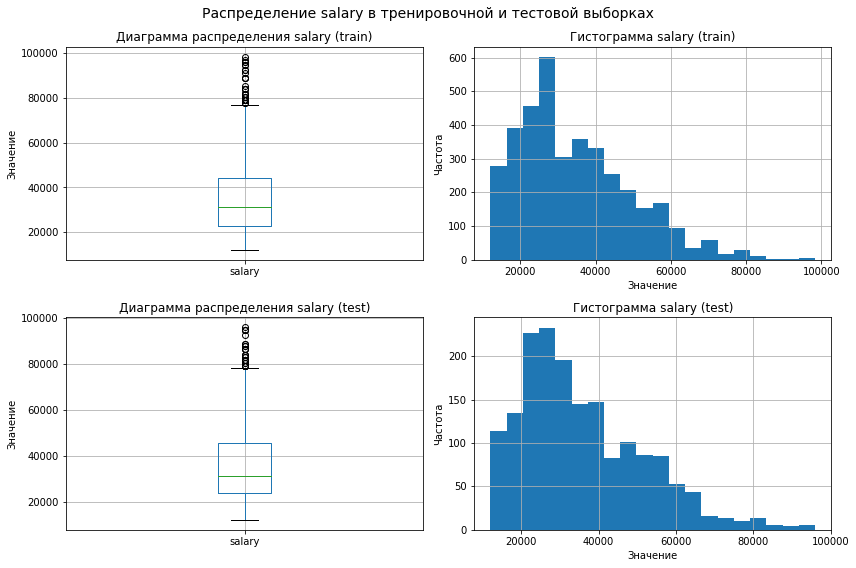


-------------------
job_satisfaction_rate
count    3755.000000
mean        0.532554
std         0.226393
min         0.030000
25%         0.350000
50%         0.550000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64
count    1717.000000
mean        0.546185
std         0.222516
min         0.030000
25%         0.370000
50%         0.570000
75%         0.720000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


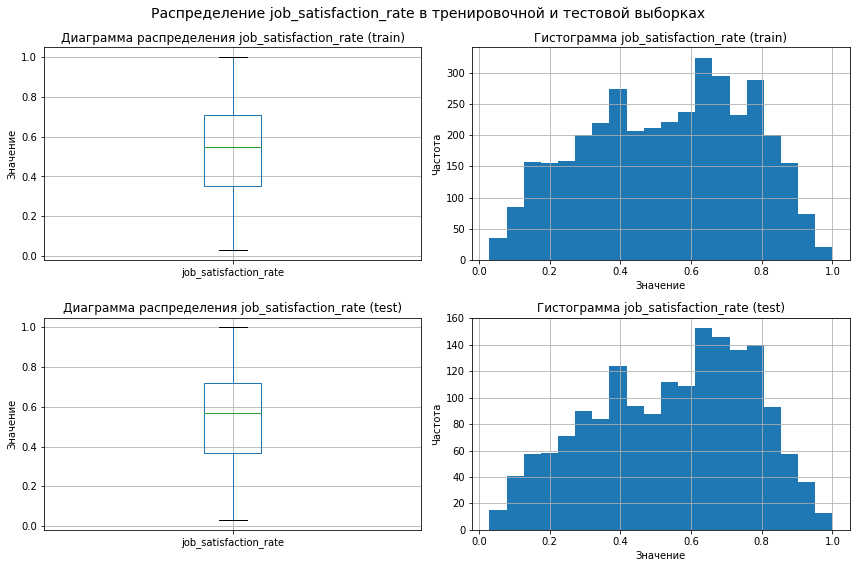


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è dept (test):
sales         596
technology    401
marketing     259
purchasing    255
hr            203
Name: dept, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
sales         34.772462
technology    23.395566
marketing     15.110852
purchasing    14.877480
hr            11.843641
Name: dept, dtype: float64


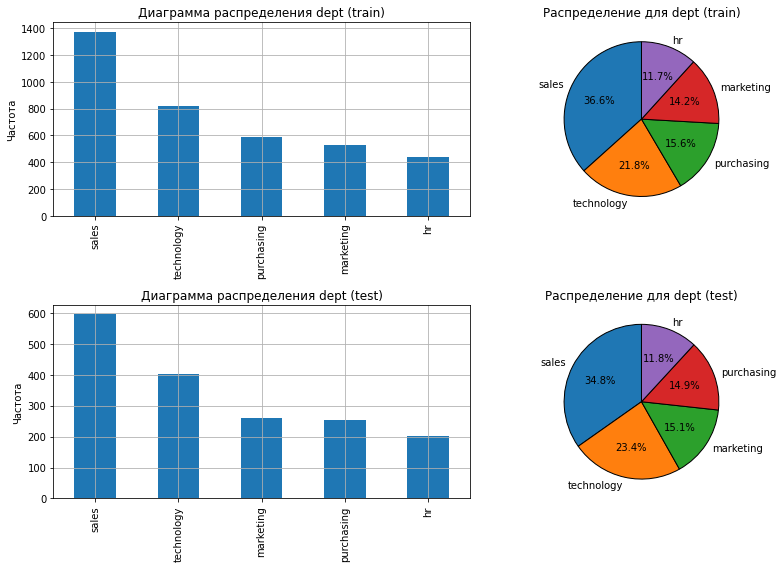


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è level (test):
middle    798
junior    749
senior    169
Name: level, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
middle    46.503497
junior    43.648019
senior     9.848485
Name: level, dtype: float64


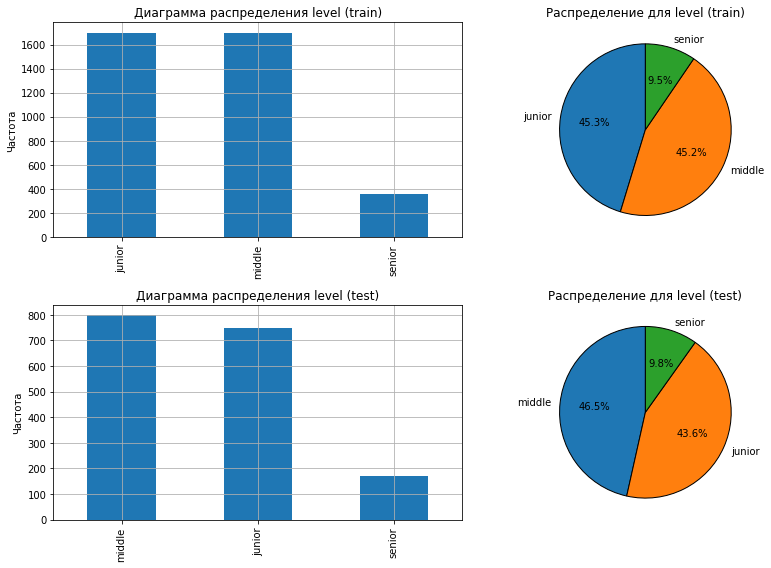


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è workload (test):
medium    868
low       494
high      354
Name: workload, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
medium    50.582751
low       28.787879
high      20.629371
Name: workload, dtype: float64


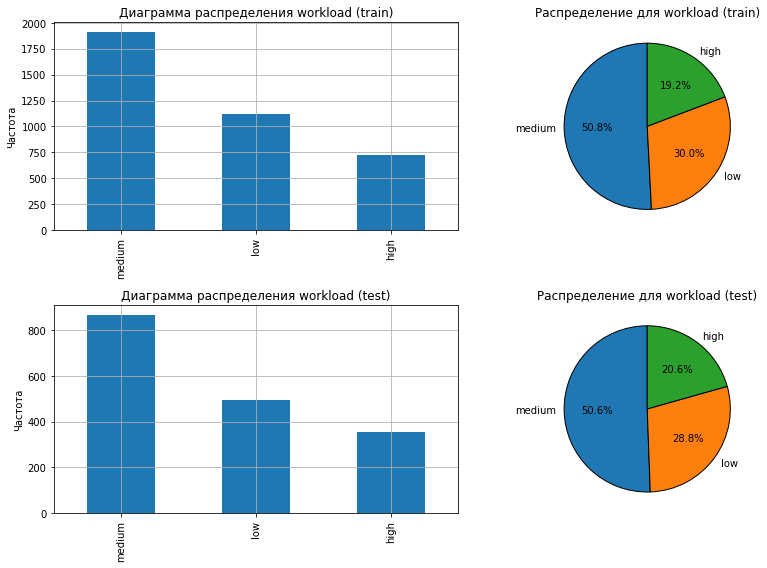


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_promo (test):
no     1654
yes      63
Name: last_year_promo, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
no     96.33081
yes     3.66919
Name: last_year_promo, dtype: float64


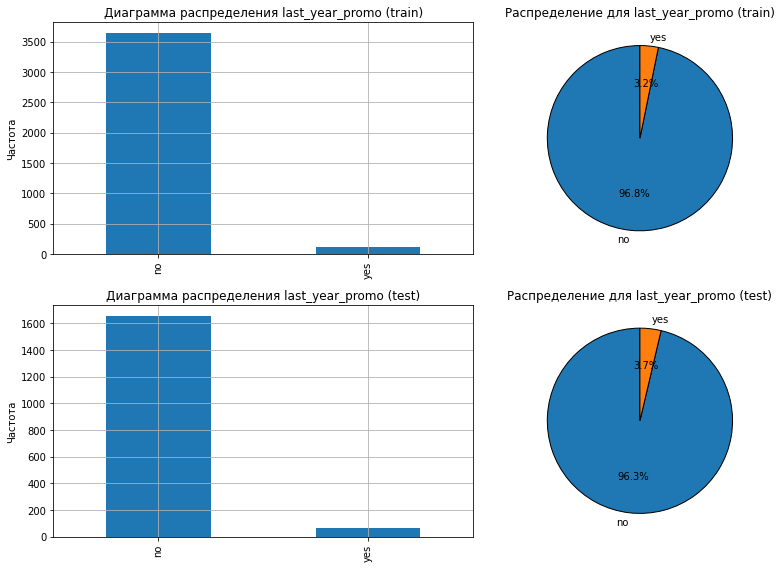


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_violations (test):
no     1467
yes     250
Name: last_year_violations, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
no     85.43972
yes    14.56028
Name: last_year_violations, dtype: float64


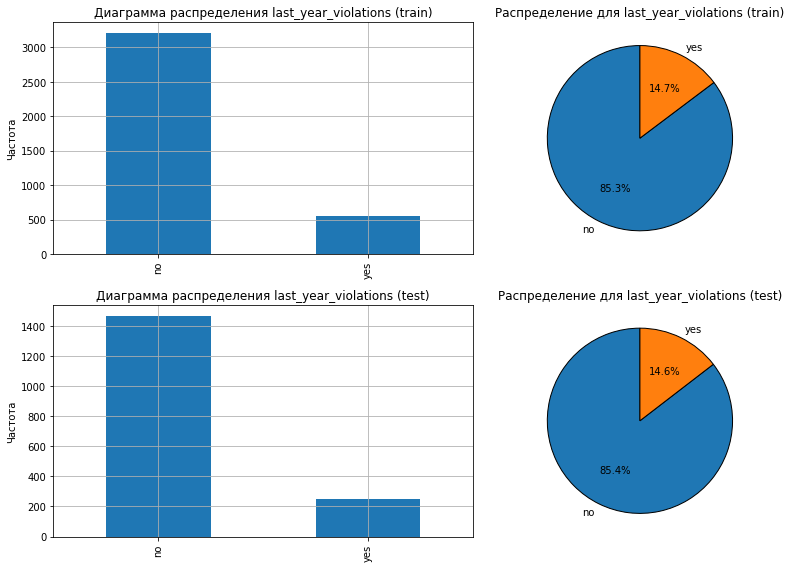


-------------------


In [32]:
string_columns = train_data_job.select_dtypes(include='object')
num_columns = (train_data_job.select_dtypes(include=['int64', 'float64'])).drop(['employment_years', 'supervisor_evaluation'], axis = 1)
discr_columns = ['employment_years', 'supervisor_evaluation']
for col in discr_columns:
    print(f"\n–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test):")
    print(test_data_job[col].value_counts())
    print("\n–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):")
    print(test_data_job[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_job[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_job[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")
    
for col in num_columns:
    print(col)
    print(train_data_job[col].describe())
    print(test_data_job[col].describe())
    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train
    train_data_job[col].plot.box(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)')
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    train_data_job[col].plot.hist(bins=20, ax=axes[0, 1])
    axes[0, 1].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col} (train)')
    axes[0, 1].grid(True)
    axes[0, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 1].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    #test
    test_data_job[col].plot.box(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)')
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    test_data_job[col].plot.hist(bins=20, ax=axes[1, 1])
    axes[1, 1].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col} (test)')
    axes[1, 1].grid(True)
    axes[1, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 1].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.suptitle(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col} –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö', fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

for col in string_columns:
    print(f"\n–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test):")
    print(test_data_job[col].value_counts())
    print("\n–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):")
    print(test_data_job[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_job[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_job[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

##### –í—ã–≤–æ–¥

–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Ö–æ–∂–∏ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞ –∏ –Ω–µ—Ç –∑–∞–º–µ—Ç–Ω—ã—Ö –ø–µ—Ä–µ–∫–æ—Å–æ–≤ –¥–∞–Ω–Ω—ã—Ö 

–ü–æ—á—Ç–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø–æ–æ–∂–µ–Ω—ã –≤–Ω—É—Ç—Ä–∏ "—É—Å–æ–≤", –Ω–æ –∏–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –±–æ–ª–µ–µ —Ä–µ–¥–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç—Ä–æ—ã–µ –≤—ã–±–∏–≤–∞—é—Ç—Å—è –∏–∑ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

–ù–∞–±–ª—é–¥–∞–µ–º—ã–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ

–í –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç –∑–Ω–∞—á–∏–º—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

+ –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏—è: `"employment_years "`, `"supervisor_evaluation"`, `"salary"`
+ –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è OHE: `"dept"`, `"last_year_promo"`, `"last_year_violations"`
+ –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è OrdinalEncoder: `"level"`, `'workload'`	
+ –¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫: `"job_satisfaction_rate"` 

#### –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –ø–æ—ç—Ç–æ–º—É –∏—Å–ø–æ–ª—å–∑—É–µ–º `Phik`

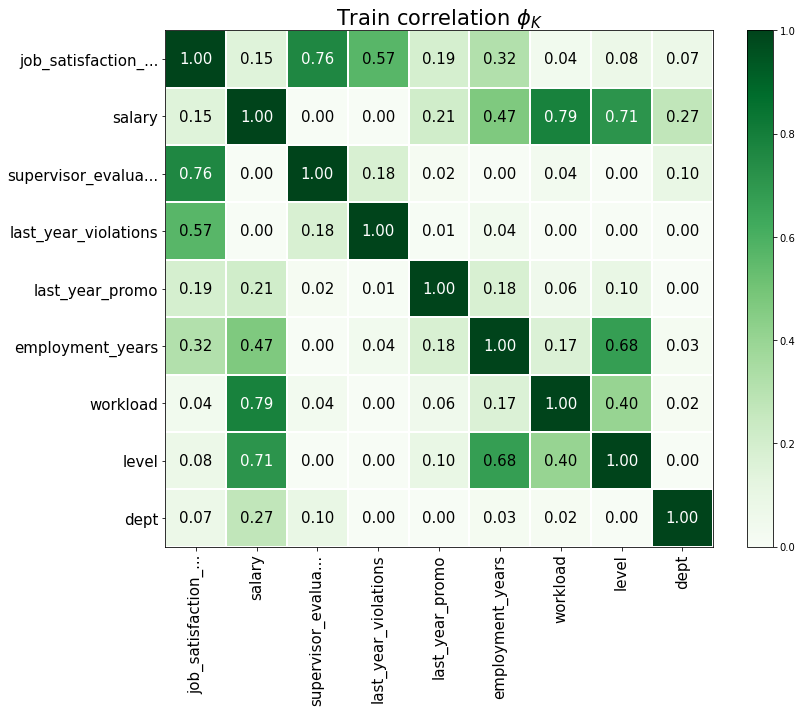

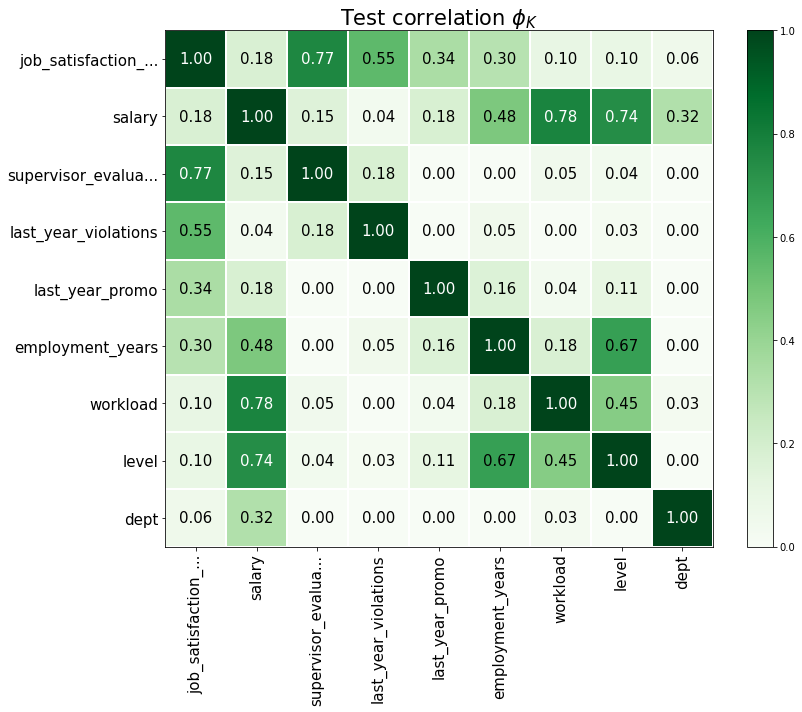

In [33]:
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

phik_train = train_data_job.phik_matrix(interval_cols=interval_cols)
phik_test = test_data_job.phik_matrix(interval_cols=interval_cols)


# Train
plot_correlation_matrix(
    phik_train.values,
    x_labels=phik_train.columns,
    y_labels=phik_train.index,
    vmin=0, vmax=1, color_map='Greens',
    title='Train correlation $\\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)  
)

# Test
plot_correlation_matrix(
    phik_test.values,
    x_labels=phik_test.columns,
    y_labels=phik_test.index,
    vmin=0, vmax=1, color_map='Greens',
    title='Test correlation $\\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
)

##### –í—ã–≤–æ–¥

–û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å

–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç —É—Ç–µ—á–∫–∏

### –®–∞–≥ 4. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [34]:
X_train = train_data_job.drop('job_satisfaction_rate', axis=1)
X_test = test_data_job.drop('job_satisfaction_rate', axis=1)
y_train = train_data_job['job_satisfaction_rate']
y_test = test_data_job['job_satisfaction_rate']

In [35]:
ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", 'workload']
num_columns = ["employment_years", "supervisor_evaluation", "salary"]

In [36]:
# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ ohe_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ OHE-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first'))
    ]
    )

# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ ord_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ Ordinal-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ num_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + Scaler
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler())
    ]
    )

# —Å–æ–∑–¥–∞—ë–º –æ–±—â–∏–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [37]:
# —Å–æ–∑–¥–∞—ë–º –∏—Ç–æ–≥–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –¥–µ—Ä–µ–≤–∞
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

### –®–∞–≥ 5. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–í–≤–µ–¥–µ–º –Ω–æ–≤—É—é –º–µ—Ç—Ä–∏–∫—É - SMAPE

In [38]:
def SMAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    metric = 100 * np.mean(numerator / denominator)
    return metric

In [39]:
smape_scorer = make_scorer(SMAPE, greater_is_better=False)

----

In [40]:
param_grid = [
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ DecisionTreeClassifier()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 15),
        'models__max_features': range(2, 10),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [41]:
%%time
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 20
)
randomized_search_1.fit(X_train, y_train)

CPU times: user 6.48 s, sys: 7.78 ms, total: 6.48 s
Wall time: 6.48 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                                         'models__max_depth': range(5, 15),
                                         'models__max_features': range(2, 10),
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(SMAPE, greater_is_better=False))

–ó–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è 7.06 s


In [42]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search_1.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π:', -randomized_search_1.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
         

In [43]:
model_1 = randomized_search_1.best_estimator_
y_pred = model_1.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 14.54835138127017


–ü—Ä–æ–≤–µ—Ä–∏–º, –º–æ–∂–Ω–æ –ª–∏ —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å

–ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

<AxesSubplot:ylabel='Feature'>

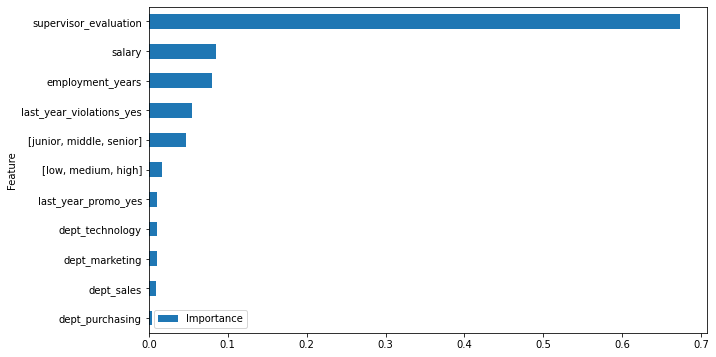

In [44]:
importances = model_1.named_steps['models'].feature_importances_
# –ü–æ–ª—É—á–∞–µ–º –∏–º–µ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
# –î–ª—è OHE
ohe_columns_new = model_1.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names_out(ohe_columns)
# –î–ª—è Ordinal Encoding
ord_columns_new = model_1.named_steps['preprocessor'].transformers_[1][1].named_steps['ord'].categories_
num_columns_new = num_columns
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
all_features = list(ohe_columns_new) + list(ord_columns_new) + list(num_columns_new)

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True) 
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

—Ç.–∫ DecisionTreeRegressor –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —Ç–æ –¥–∞–ª–µ–µ –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å —ç—Ç–æ–π –º–æ–¥–µ–ª—å—é

–ü–æ–ø—Ä–æ–±—É–µ–º –æ—Ç–æ–±—Ä–∞—Ç—å k –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏ –ø–æ–º–æ—â–∏ SelectKBest

In [45]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('selector', SelectKBest(mutual_info_regression, k=6)),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [46]:
param_grid = {
    'models__max_depth': distributions.IntDistribution(7, 15),
    'models__max_features': distributions.IntDistribution(2, 9),
    'models__min_samples_split': distributions.IntDistribution(2, 6),
    'models__min_samples_leaf': distributions.IntDistribution(1, 6),
    'selector__k': distributions.IntDistribution(5, 10),
}

In [47]:
%%time
randomized_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_trials = 30
)
randomized_search.fit(X_train, y_train)

<timed exec>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2025-01-20 16:02:05,077] A new study created in memory with name: no-name-c4780575-d052-4226-bcda-affc56401caf
[I 2025-01-20 16:02:16,767] Trial 2 finished with value: -19.51293613541751 and parameters: {'models__max_depth': 7, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'selector__k': 7}. Best is trial 2 with value: -19.51293613541751.
[I 2025-01-20 16:02:17,665] Trial 3 finished with value: -19.316122231341133 and parameters: {'models__max_depth': 7, 'models__max_features': 7, 'models__min_samples_split': 3, 'models__min_samples_leaf': 5, 'selector__k': 9}. Best is trial 3 with value: -19.316122231341133.
[I 2025-01-20 16:02:17,672] Trial 4 finished with value: -18.088301839786922 and parameters: {'models__max_depth': 8, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf

CPU times: user 44.6 s, sys: 2.88 s, total: 47.5 s
Wall time: 47.6 s


OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['dept',
                                                                            'last_year_promo',
                                                                            'last_year_violations']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('simpleImputer_before_ord',
                                                                                            SimpleI...
               param_distributions={'models__max_depth': IntDistribution(high=15, log=False, low=7, step=1),
                                    'models__max_features': IntDistribution(high=9, log=False, low=2, step=1),
                                    'models__min_samples_leaf': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__min_samples_split': IntDistribution(high=6, log=False, low=2, step=1),
                                    'selector__k': IntDistribution(high=10, log=False, low=5, step=1)},
               random_state=42,
               scoring=make_scorer(SMAPE, greater_is_better=False))

–ó–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è 2min 28s

In [48]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', -randomized_search.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
         

In [49]:
model_2 = randomized_search.best_estimator_
y_pred = model_2.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 14.465443680007867


–ü–æ–ø—Ä–æ–±—É–µ–º —Å–æ–∑–¥–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –ü–æ–ª–∏–Ω–æ–º–∏–∑–∞—Ü–∏–∏ –∏ –¥–æ–±–∞–≤–∏–º –≤ –ø–∞–π–ø–ª–∞–π–Ω num_pipe –ø–æ–ª–∏–Ω–æ–º–∏–∑–∞—Ü–∏—é

In [50]:
# –ü–æ–≤—Ç–æ—Ä—è–µ–º —à–∞–≥–∏
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler()),
     ('poly', PolynomialFeatures(degree=2))
    ]
    )

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse=False)),
     ('poly', PolynomialFeatures(degree=2))
    ]
    )

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

param_grid = {
    'models__max_depth': distributions.IntDistribution(5, 15),
    'models__min_samples_split': distributions.IntDistribution(2, 5),
    'models__min_samples_leaf': distributions.IntDistribution(1, 6),
    'selector__k': distributions.IntDistribution(5, 10),
}

In [51]:
%%time
randomized_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_trials = 30
)
randomized_search.fit(X_train, y_train)

<timed exec>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2025-01-20 16:02:53,042] A new study created in memory with name: no-name-b2eea28d-a14e-4be1-b8fd-9d4188e62f53
[I 2025-01-20 16:03:05,274] Trial 0 finished with value: -15.366857450495877 and parameters: {'models__max_depth': 12, 'models__min_samples_split': 4, 'models__min_samples_leaf': 3, 'selector__k': 10}. Best is trial 0 with value: -15.366857450495877.
[I 2025-01-20 16:03:05,649] Trial 6 finished with value: -18.059250044998425 and parameters: {'models__max_depth': 9, 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'selector__k': 8}. Best is trial 0 with value: -15.366857450495877.
[I 2025-01-20 16:03:05,652] Trial 2 finished with value: -17.390405136572383 and parameters: {'models__max_depth': 10, 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'selector__k': 8}. Best is trial 0 with value: -15.366857450495877.
[I

CPU times: user 44.9 s, sys: 2.58 s, total: 47.5 s
Wall time: 47.6 s


OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['dept',
                                                                            'last_year_promo',
                                                                            'last_year_violations']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('simpleImputer_before_ord',
                                                                                            SimpleI...
               param_distributions={'models__max_depth': IntDistribution(high=15, log=False, low=5, step=1),
                                    'models__min_samples_leaf': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__min_samples_split': IntDistribution(high=5, log=False, low=2, step=1),
                                    'selector__k': IntDistribution(high=10, log=False, low=5, step=1)},
               random_state=42,
               scoring=make_scorer(SMAPE, greater_is_better=False))

In [52]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', -randomized_search.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
         

In [53]:
model_3 = randomized_search.best_estimator_
y_pred = model_3.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 15.280145179703844


#### –í—ã–≤–æ–¥

+ –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å `DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=4, random_state=42))`
+ –ú–µ—Ç—Ä–∏–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ—ã–π –≤—ã–±–æ—Ä–∫–µ SMAPE = 14.54835138127017 
+ –í—Ä–µ–º—è –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –ø–æ–∏—Å–∫ —Å –ø–æ–º–æ—â—å—é RandomizedSearch –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∫—Ä–æ—Å—Å_–í–∞–ª–∏–¥–∞—Ü–∏–∏ -  6.39 s
+ –ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞ `supervisor_evaluation` –∑–∞–º–µ—Ç–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, –∏ –æ—Ç –Ω–µ–≥–æ –≤ –±–æ–ª—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –∑–∞–≤–∏—Å–∏—Ç —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞
+ –¢–∞–∫–∂–µ –≤–∞–∂–Ω—ã–º–∏ —è–≤–ª—è—é—Ç—Å—è `emplyment_years`, `salary` –∏ `last_year_violations`
+ –ü–æ—á—Ç–∏ –Ω–µ–≤–∞–∂–Ω–æ –Ω–∞—Å–∫–æ–ª—å–∫–æ –∑–∞–≥—Ä—É–µ–Ω —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –∏–ª–∏ –∫–∞–∫–æ–π —É –Ω–µ–≥–æ grade –∞ —Ç–∞–∫–∂–µ –Ω–µ–≤–∞–∂–Ω–æ –≤ –∫–∞–∫–æ–º –æ–Ω –æ—Ç–¥–µ–ª–µ —Ä–∞–±–æ—Ç–∞–µ—Ç

## –ó–∞–¥–∞—á–∞ 2: –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ –∏–∑ –∫–æ–º–ø–∞–Ω–∏–∏

### –®–∞–≥ 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [104]:
train_data_quit = pd.read_csv('/datasets/train_quit.csv', index_col='id')
test_features_quit = pd.read_csv('/datasets/test_features.csv', index_col='id')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', index_col='id')

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è –ø–µ—Ä–≤—á–∏–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [105]:
datasets_str = ['train_data_quit', 'test_features_quit', 'test_target_quit']
datasets = [train_data_quit, test_features_quit, test_target_quit]

In [106]:
def data_info(dataset):
    print("–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞")
    display(dataset.head())
    print('\n\n–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è')
    dataset.info()
    print('-' * 50)
    print('\n\n')

In [107]:
for i, dataset in enumerate(datasets):
    print(datasets_str[i])
    data_info(dataset)

train_data_quit
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
723290                   no                      4   54000   no  
814010                   no                      4   27600   no  
155091                   no                      1   37200   no  
257132                  yes                      3   24000  yes  
910140                   no                      5   25200   no



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB
--------------------------------------------------



test_features_quit
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
485046                   no                      5   28800  
686555                   no                      4   30000  
467458                   no                      4   19200  
418655                   no                      4   19200  
789145                   no                      5   40800



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
--------------------------------------------------



test_target_quit
–ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞


quit
id         
999029  yes
372846   no
726767   no
490105   no
416898  yes



–ü–µ—Ä–≤–∏—á–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB
--------------------------------------------------





### –®–∞–≥ 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

#### –û–±—å–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü

In [108]:
datasets_str

['train_data_quit', 'test_features_quit', 'test_target_quit']

–û–±—å–µ–¥–∏–Ω–∏–º –¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å–æ –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏

In [109]:
test_data_quit = test_features_quit.join(test_target_quit, how = 'left')
test_data_quit.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
485046                   no                      5   28800   no  
686555                   no                      4   30000   no  
467458                   no                      4   19200   no  
418655                   no                      4   19200   no  
789145                   no                      5   40800   no

In [110]:
# Check
test_target_quit[test_target_quit.index == 485046]

quit
id         
485046   no

In [111]:
test_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 220.8+ KB


#### –ü–æ–∏—Å–∫ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [112]:
string_columns = train_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(train_data_quit[col].unique())
    print()

dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']

level
['middle' 'junior' 'sinior']

workload
['high' 'medium' 'low']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



In [113]:
string_columns = test_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(test_data_quit[col].unique())
    print()

dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

level
['junior' 'middle' 'sinior' nan]

workload
['medium' 'low' 'high' ' ']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



–ó–∞–º–µ–Ω–∏–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏ –Ω–∞ Nan

In [114]:
test_data_quit.loc[test_data_quit['dept'] == ' ', 'dept'] = np.nan
test_data_quit.loc[test_data_quit['workload'] == ' ', 'workload'] = np.nan

In [115]:
test_data_quit.loc[test_data_quit['level'] == 'sinior', 'level'] = 'senior'
train_data_quit.loc[train_data_quit['level'] == 'sinior', 'level'] = 'senior'

In [116]:
#Check
string_columns = test_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(test_data_quit[col].unique())
    print()

dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]

level
['junior' 'middle' 'senior' nan]

workload
['medium' 'low' 'high' nan]

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



–ü—Ä–æ–≤–µ—Ä–º –Ω–∞–ª–∏—á–∏–µ —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [117]:
print(train_data_quit.reset_index().duplicated().sum())
print(test_data_quit.reset_index().duplicated().sum())

0
0


–ù–µ—Ç —è–≤–Ω—ã—Ö—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [118]:
train_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [119]:
test_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1997 non-null   object
 1   level                  1999 non-null   object
 2   workload               1999 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 220.8+ KB


#### –í—ã–≤–æ–¥

–í—ã–ø–æ–ª–Ω–µ–Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–î–∞–Ω–Ω—ã–µ –æ–±—å–µ–¥–∏–Ω–µ–Ω—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É

–ò—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –æ—à–∏–±–∫–∏ –≤ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö 

–î—É–±–ª–∏–∫–∞—Ç—ã –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã

### –®–∞–≥ 3. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

#### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö


–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è employment_years (test):
1     522
2     374
3     234
4     187
5     179
7     174
6     138
8      91
9      66
10     35
Name: employment_years, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
1     26.10
2     18.70
3     11.70
4      9.35
5      8.95
7      8.70
6      6.90
8      4.55
9      3.30
10     1.75
Name: employment_years, dtype: float64


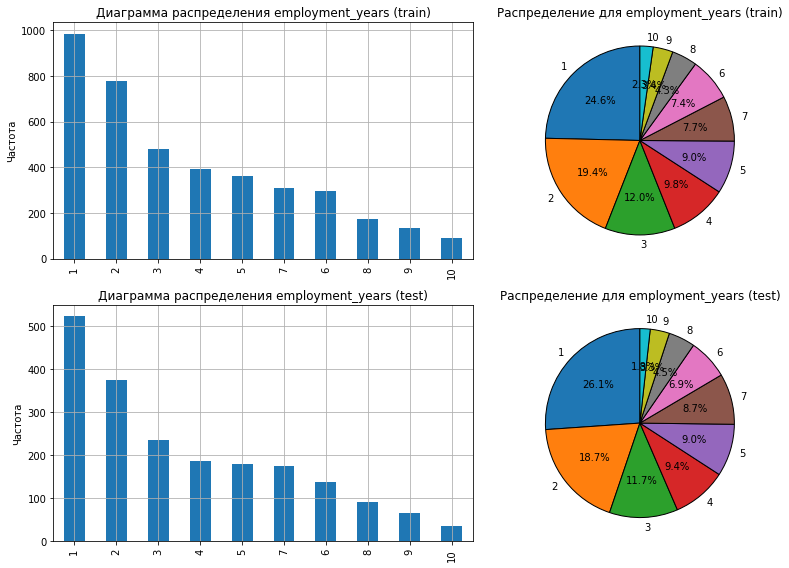


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è supervisor_evaluation (test):
4    857
3    575
5    284
2    196
1     88
Name: supervisor_evaluation, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
4    42.85
3    28.75
5    14.20
2     9.80
1     4.40
Name: supervisor_evaluation, dtype: float64


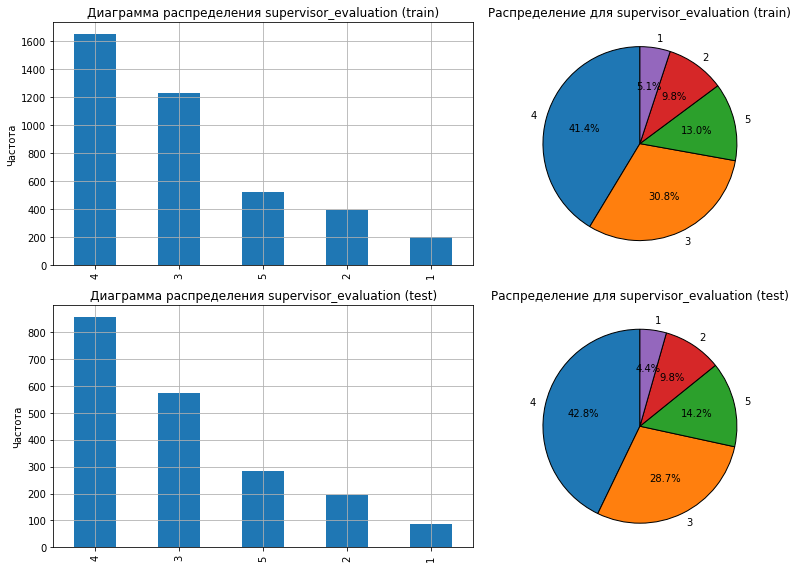


-------------------
salary
count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64
count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


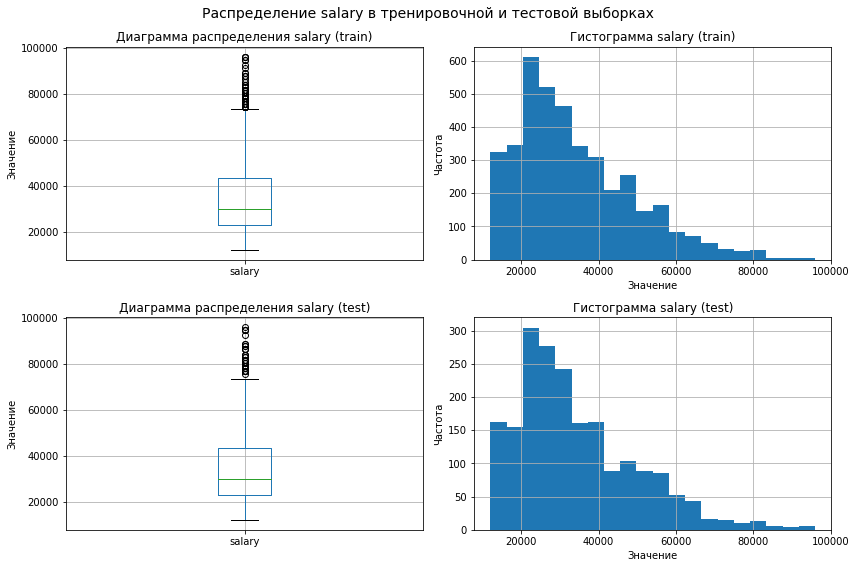


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è dept (test):
sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
sales         38.207311
technology    22.784176
marketing     13.970956
purchasing    13.670506
hr            11.367051
Name: dept, dtype: float64


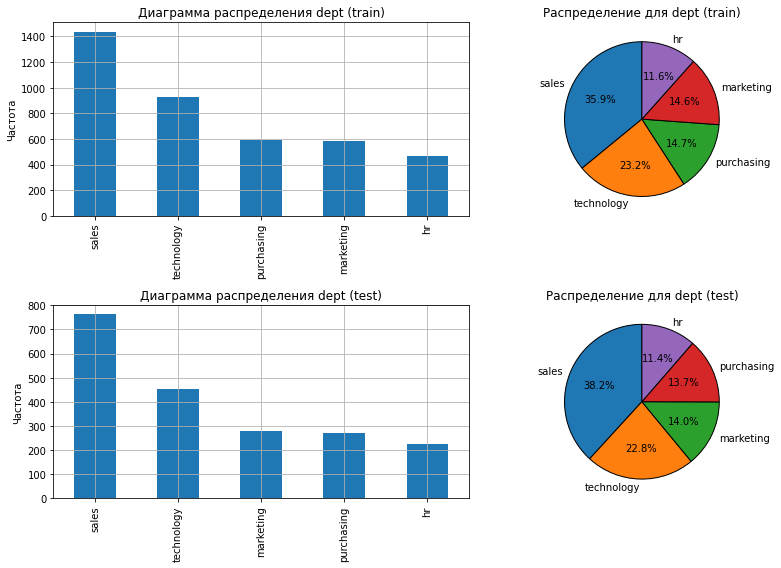


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è level (test):
junior    974
middle    854
senior    171
Name: level, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
junior    48.724362
middle    42.721361
senior     8.554277
Name: level, dtype: float64


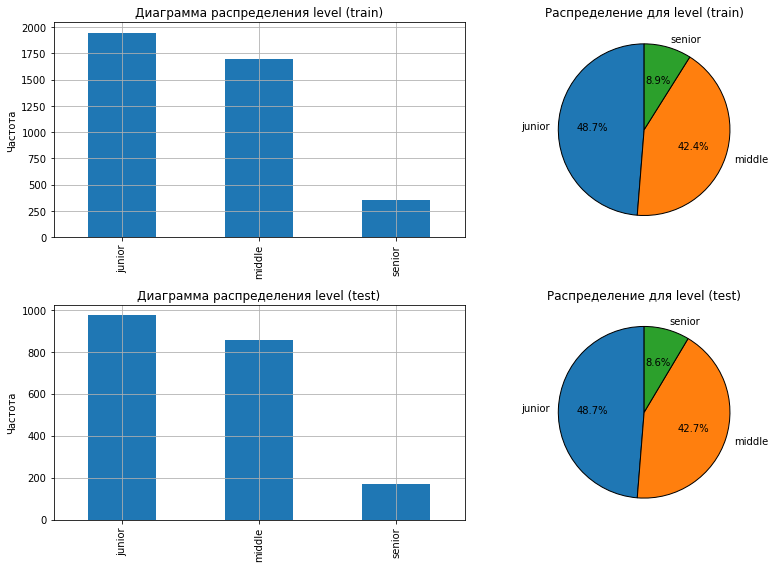


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è workload (test):
medium    1043
low        593
high       363
Name: workload, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
medium    52.176088
low       29.664832
high      18.159080
Name: workload, dtype: float64


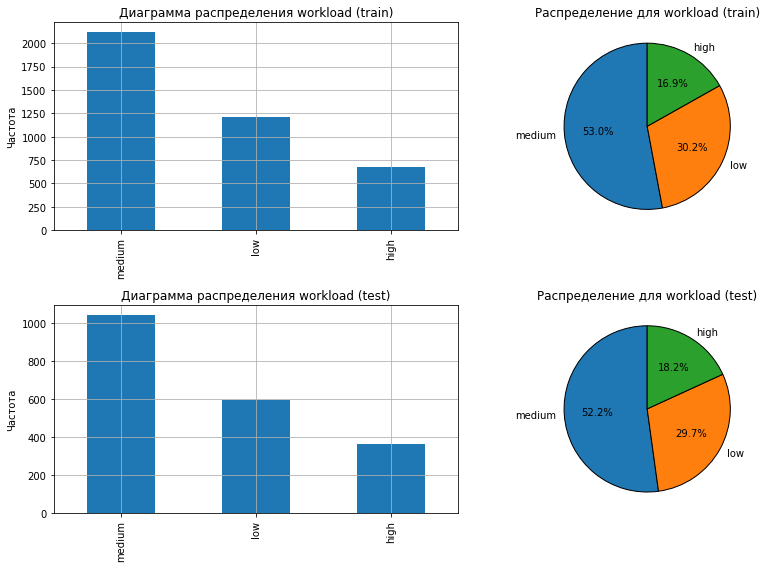


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_promo (test):
no     1937
yes      63
Name: last_year_promo, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
no     96.85
yes     3.15
Name: last_year_promo, dtype: float64


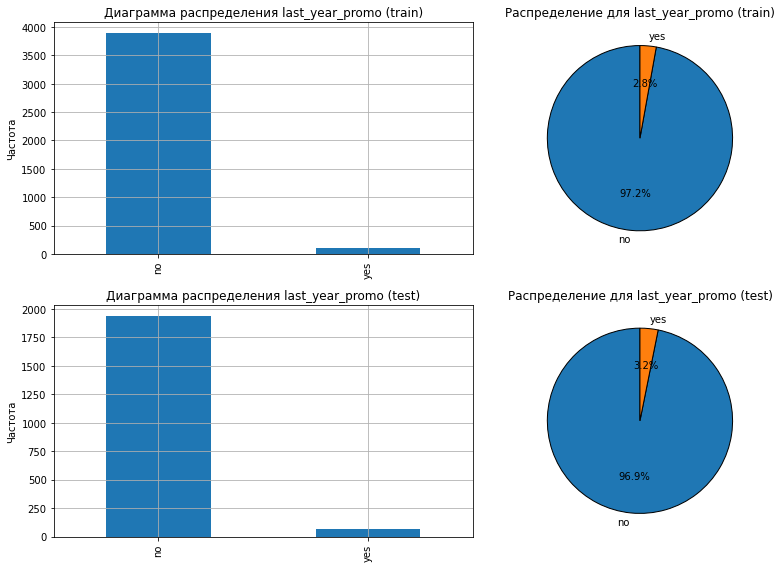


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_violations (test):
no     1738
yes     262
Name: last_year_violations, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
no     86.9
yes    13.1
Name: last_year_violations, dtype: float64


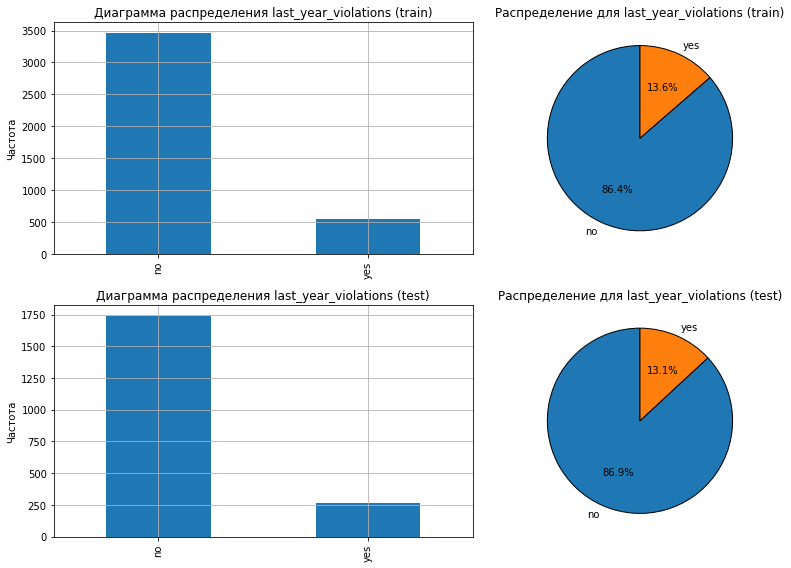


-------------------

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è quit (test):
no     1436
yes     564
Name: quit, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):
no     71.8
yes    28.2
Name: quit, dtype: float64


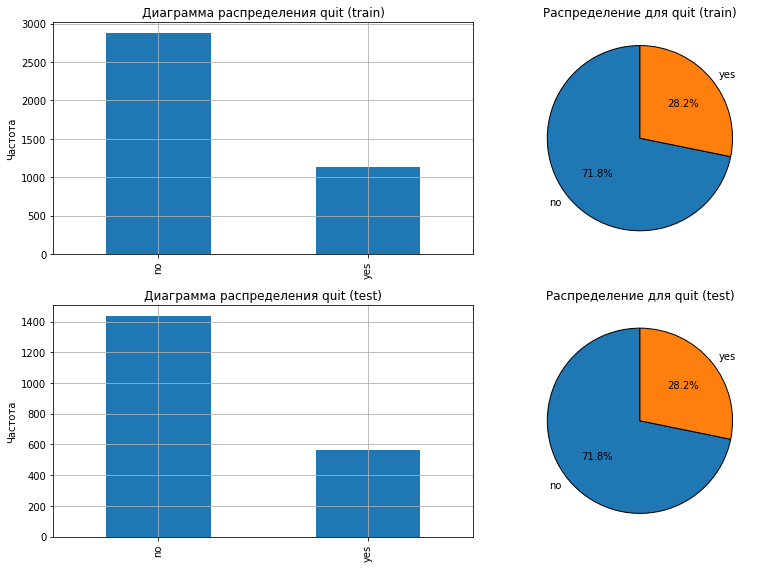


-------------------


In [120]:
string_columns = train_data_quit.select_dtypes(include='object')
num_columns = (train_data_quit.select_dtypes(include=['int64', 'float64'])).drop(['employment_years', 'supervisor_evaluation'], axis = 1)
discr_columns = ['employment_years', 'supervisor_evaluation']
for col in discr_columns:
    print(f"\n–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test):")
    print(test_data_quit[col].value_counts())
    print("\n–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):")
    print(test_data_quit[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_quit[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_quit[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")
    
for col in num_columns:
    print(col)
    print(train_data_quit[col].describe())
    print(test_data_quit[col].describe())
    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train
    train_data_quit[col].plot.box(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)')
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    train_data_quit[col].plot.hist(bins=20, ax=axes[0, 1])
    axes[0, 1].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col} (train)')
    axes[0, 1].grid(True)
    axes[0, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 1].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    #test
    test_data_quit[col].plot.box(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)')
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    test_data_quit[col].plot.hist(bins=20, ax=axes[1, 1])
    axes[1, 1].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col} (test)')
    axes[1, 1].grid(True)
    axes[1, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 1].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.suptitle(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col} –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö', fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

for col in string_columns:
    print(f"\n–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test):")
    print(test_data_quit[col].value_counts())
    print("\n–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (test):")
    print(test_data_quit[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_quit[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_quit[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

##### –í—ã–≤–æ–¥

–ü–æ—á—Ç–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø–æ–æ–∂–µ–Ω—ã –≤–Ω—É—Ç—Ä–∏ "—É—Å–æ–≤", –Ω–æ –∏–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –±–æ–ª–µ–µ —Ä–µ–¥–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç—Ä–æ—ã–µ –≤—ã–±–∏–≤–∞—é—Ç—Å—è –∏–∑ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Ö–æ–∂–∏ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞ –∏ –Ω–µ—Ç –∑–∞–º–µ—Ç–Ω—ã—Ö –ø–µ—Ä–µ–∫–æ—Å–æ–≤ –¥–∞–Ω–Ω—ã—Ö 

–ù–∞–±–ª—é–¥–∞–µ–º—ã–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ

–í —Ü–µ–ª–µ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ `quit` –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏—è: "employment_years ", "supervisor_evaluation", "salary"
–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è OHE: "dept", "last_year_promo", "last_year_violations"
–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è OrdinalEncoder: "level", 'workload'
–¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫: `"quit"`

<div class="alert alert-success">
<font size="5"><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞V2</b></font>



–£—Å–ø–µ—Ö üëç:



–¢—É—Ç –≤–µ—Ä–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—à—å –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —á—Ç–æ –∏ –≤—ã—à–µ,  –Ω–æ —É—á—Ç–∏   –∑–∞–º–µ—á–∞–Ω–∏—è —Å–¥–µ–ª–∞–Ω–Ω—ã–µ –º–Ω–æ–π –¥–ª—è –ø–µ—Ä–≤–æ–π –ø–∞—Ä—ã –¥–∞–Ω–Ω—ã—Ö


 

<div class="alert alert-info"> <b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ —Å—Ç—É–¥–µ–Ω—Ç–∞V1:</b> –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–æ</div>

#### –°–æ—Å—Ç–∞–≤–∏–º –ø–æ—Ä—Ç—Ä–µ—Ç ¬´—É–≤–æ–ª–∏–≤—à–µ–≥–æ—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞¬ª

In [121]:
train_data_quit.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
723290                   no                      4   54000   no  
814010                   no                      4   27600   no  
155091                   no                      1   37200   no  
257132                  yes                      3   24000  yes  
910140                   no                      5   25200   no

In [122]:
emp_quit = train_data_quit[train_data_quit['quit'] == 'yes']
emp_work = train_data_quit[train_data_quit['quit'] == 'no']
print(emp_quit['quit'].unique())
emp_quit.info()

['yes']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 257132 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1128 non-null   object
 1   level                  1128 non-null   object
 2   workload               1128 non-null   object
 3   employment_years       1128 non-null   int64 
 4   last_year_promo        1128 non-null   object
 5   last_year_violations   1128 non-null   object
 6   supervisor_evaluation  1128 non-null   int64 
 7   salary                 1128 non-null   int64 
 8   quit                   1128 non-null   object
dtypes: int64(3), object(6)
memory usage: 88.1+ KB


–°—Ä–∞–≤–Ω–∏–º –≤—ã–±–æ—Ä–∫–∏

In [123]:
emp_quit.describe()

employment_years  supervisor_evaluation        salary
count       1128.000000            1128.000000   1128.000000
mean           1.844858               3.046099  23885.106383
std            1.274920               0.973291   9351.599505
min            1.000000               1.000000  12000.000000
25%            1.000000               3.000000  16800.000000
50%            1.000000               3.000000  22800.000000
75%            2.000000               4.000000  27600.000000
max           10.000000               5.000000  79200.000000

In [124]:
emp_work.describe()

employment_years  supervisor_evaluation        salary
count       2872.000000            2872.000000   2872.000000
mean           4.430710               3.643106  37702.228412
std            2.544635               0.965295  15218.977339
min            1.000000               1.000000  12000.000000
25%            2.000000               3.000000  25200.000000
50%            4.000000               4.000000  34800.000000
75%            6.000000               4.000000  46800.000000
max           10.000000               5.000000  96000.000000

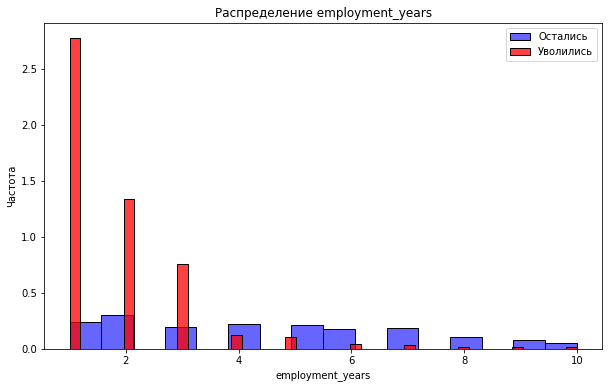

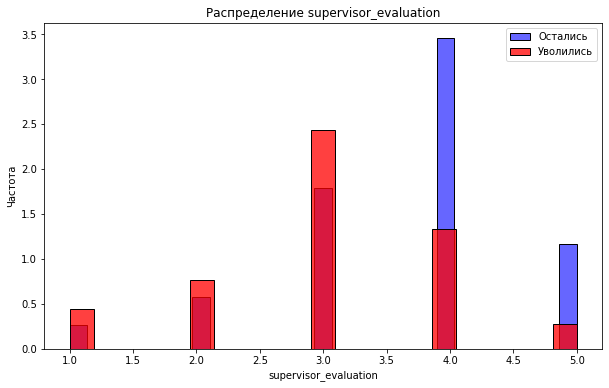

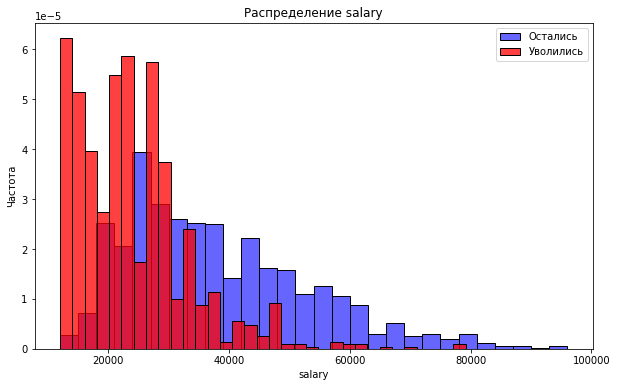

In [125]:
cols_to_hist = ['employment_years','supervisor_evaluation','salary']
for col in cols_to_hist:
    plt.figure(figsize=(10, 6))
    sns.histplot(emp_work[col], label='–û—Å—Ç–∞–ª–∏—Å—å', color='blue', alpha=0.6, stat='density', common_norm=False)
    sns.histplot(emp_quit[col], label='–£–≤–æ–ª–∏–ª–∏—Å—å', color='red', stat='density', common_norm=False)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}')
    plt.xlabel(col)
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.legend()
    plt.show()

–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è dept:
sales         407
technology    276
purchasing    166
marketing     163
hr            116
Name: dept, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
sales         36.081560
technology    24.468085
purchasing    14.716312
marketing     14.450355
hr            10.283688
Name: dept, dtype: float64


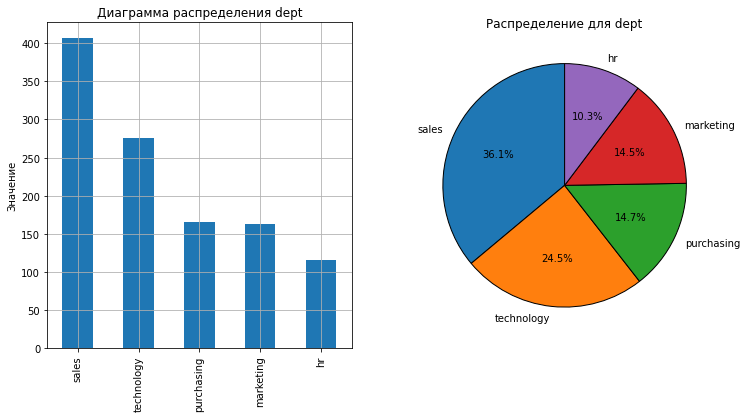


-------------------
–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è level:
junior    1003
middle     108
senior      17
Name: level, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
junior    88.918440
middle     9.574468
senior     1.507092
Name: level, dtype: float64


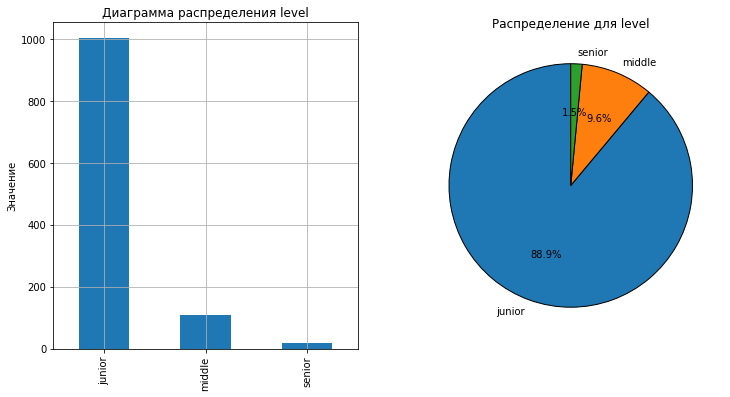


-------------------
–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è workload:
low       519
medium    488
high      121
Name: workload, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
low       46.010638
medium    43.262411
high      10.726950
Name: workload, dtype: float64


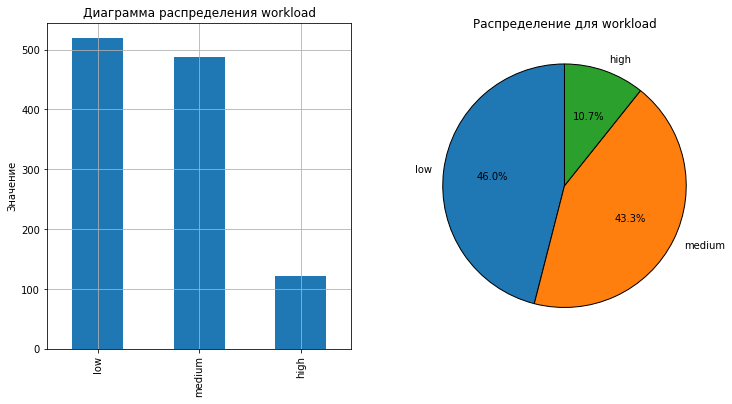


-------------------
–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_promo:
no     1127
yes       1
Name: last_year_promo, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
no     99.911348
yes     0.088652
Name: last_year_promo, dtype: float64


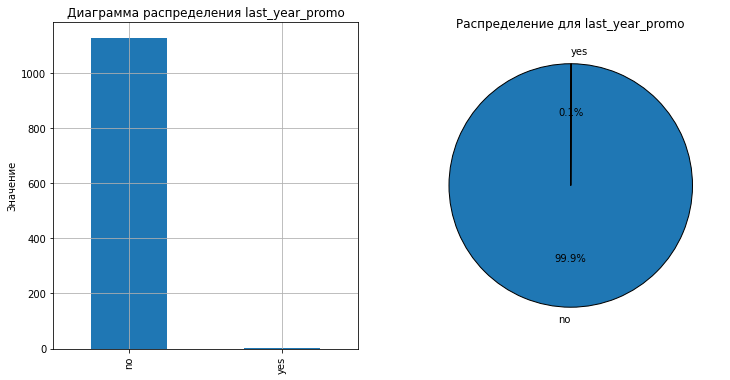


-------------------
–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è last_year_violations:
no     900
yes    228
Name: last_year_violations, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
no     79.787234
yes    20.212766
Name: last_year_violations, dtype: float64


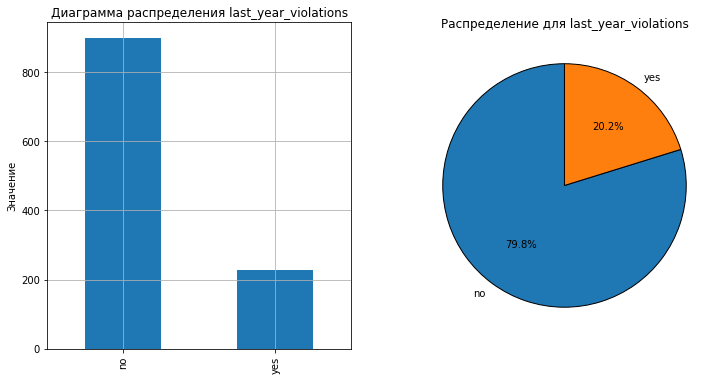


-------------------
–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è quit:
yes    1128
Name: quit, dtype: int64

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:
yes    100.0
Name: quit, dtype: float64


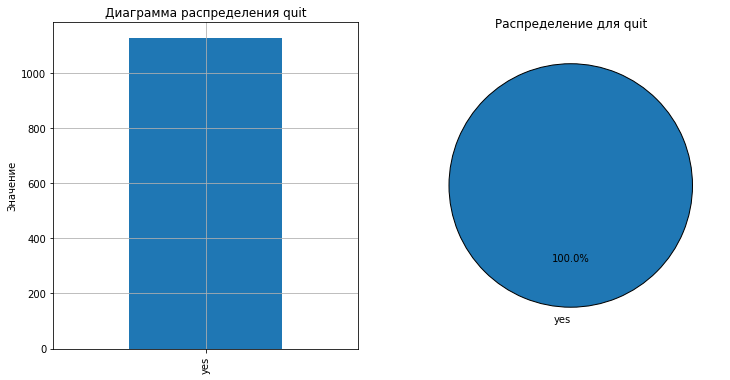


-------------------


In [126]:
string_columns = emp_quit.select_dtypes(include='object')

for col in string_columns:
    print(f"–ß–∞—Å—Ç–æ—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col}:")
    print(emp_quit[col].value_counts())
    print("\n–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ:")
    print(emp_quit[col].value_counts(normalize=True) * 100)

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    emp_quit[col].value_counts().plot.bar(ax=axes[0])
    axes[0].set_title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col}')
    axes[0].grid(True)
    axes[0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    axes[0].tick_params(axis='x', rotation=90)
    emp_quit[col].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è {col}')
    plt.ylabel('')
    plt.show()

    print("\n-------------------")

–ü—Ä–æ–≤–µ–¥–µ–º –∞–Ω–∞–ª–∏–∑ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω

–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è dept:
sales         28.303199
technology    29.741379
purchasing    28.231293
marketing     28.006873
hr            25.000000
Name: dept, dtype: float64


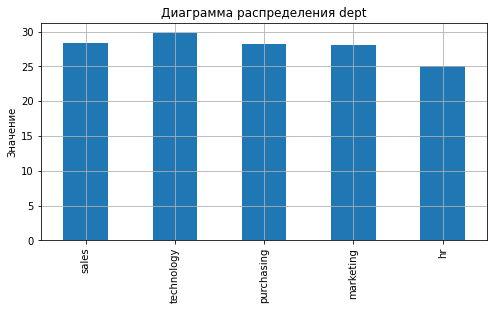


-------------------
–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è workload:
high      17.952522
low       42.963576
medium    23.040604
Name: workload, dtype: float64


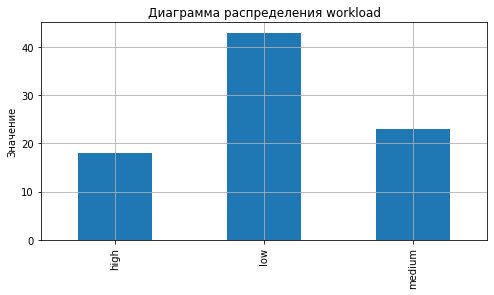


-------------------
–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è level:
junior    51.462288
middle     6.375443
senior     4.761905
Name: level, dtype: float64


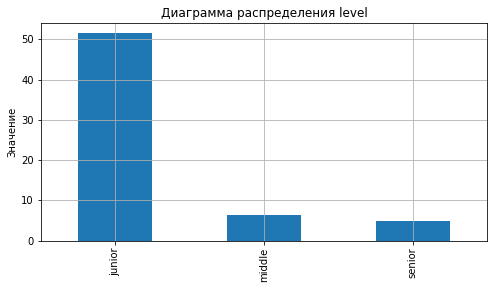


-------------------


In [127]:
cols = ['dept', 'workload', 'level']

for col in cols:
    rel_analys = emp_quit[col].value_counts()/train_data_quit[col].value_counts()*100
    print(f"–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è {col}:")
    print(rel_analys)
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    plt.figure(figsize=(8, 4))
    rel_analys.plot.bar()
    plt.title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è {col}')
    plt.grid(True)
    plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.tick_params(axis='x', rotation=90)
    plt.show()
    print("\n-------------------")

##### –í—ã–≤–æ–¥

+ –£–≤–æ–ª–∏–≤—à–∏–µ—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –∏–º–µ–ª–∏ –æ–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –≤ –∫–æ–º–ø–Ω–∏–∏ –º–µ–Ω—å—à–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ 3 –≥–æ–¥–∞

+ –ü–æ–ª—É—á–∞–ª–∏ –±–æ–ª–µ–µ –Ω–∏–∑–∫—É—é –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞

+ –ü–æ–ª—É—á–∞–ª–∏ –∑–∞—Ä–ø–æ–∞—Ç—É –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ 15000 –º–µ–Ω—å—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö

+ 89 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è –±—ã–ª–∏ –¥–∂—É–Ω–∞–º–∏, –∞ —É–≤–æ–ª—å–Ω—è–µ—Ç—Å—è 51 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –≤—Å–µ—Ö –¥–∂—É–Ω–æ–≤

+ 46 –ø—Ä–æ—Ü–µ–Ω—Ç–∞ —É–≤–æ–ª–≤—à–∏—Ö—Å—è –∏–º–µ–ª–∏ –Ω–∏–∑–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ—Å—Ç–∏ –∏ 43 –ø—Ä–æ—Ü–µ–Ω—Ç–∞ —Å—Ä–µ–¥–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å

+ –ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è –ø–æ –æ—Ç–¥–µ–ª–∞–º:
    + sales         36.081560
    + technology    24.468085
    + purchasing    14.716312
    + marketing     14.450355
    + hr            10.283688
    
+ –ù–æ –∑–∞–º–µ—Ç–∏–º, —á—Ç–æ –ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —É–≤–æ–ª–∏–≤—à–∏—Ö—Å—è –ø–æ –æ—Ç–¥–µ–ª–∞–º –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è:
    + sales         28.303199
    + technology    29.741379
    + purchasing    28.231293
    + marketing     28.006873
    + hr            25.000000
    
–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ —É–≤–æ–ª–Ω–µ–Ω–∏–π –∏–∑ –æ—Ç–¥–µ–ª–∞ `technology`

#### –ê–Ω–∞–ª–∏–∑ —Å–≤—è–∑–∏ —É–¥–æ–≤–ª–µ—Ç–æ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è

–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ —Å –æ–±–æ–∏–º–∏ —Ü–µ–ª–µ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏

In [128]:
test_data_analys = test_data_job.join(test_target_quit, how = 'left')
test_data_analys.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
429973  purchasing  middle   medium                 6              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
429973                   no                      3   42000   

        job_satisfaction_rate quit  
id                                  
485046                   0.79   no  
467458                   0.64   no  
418655                   0.60   no  
789145                   0.75   no  
429973                   0.67  yes

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ phik

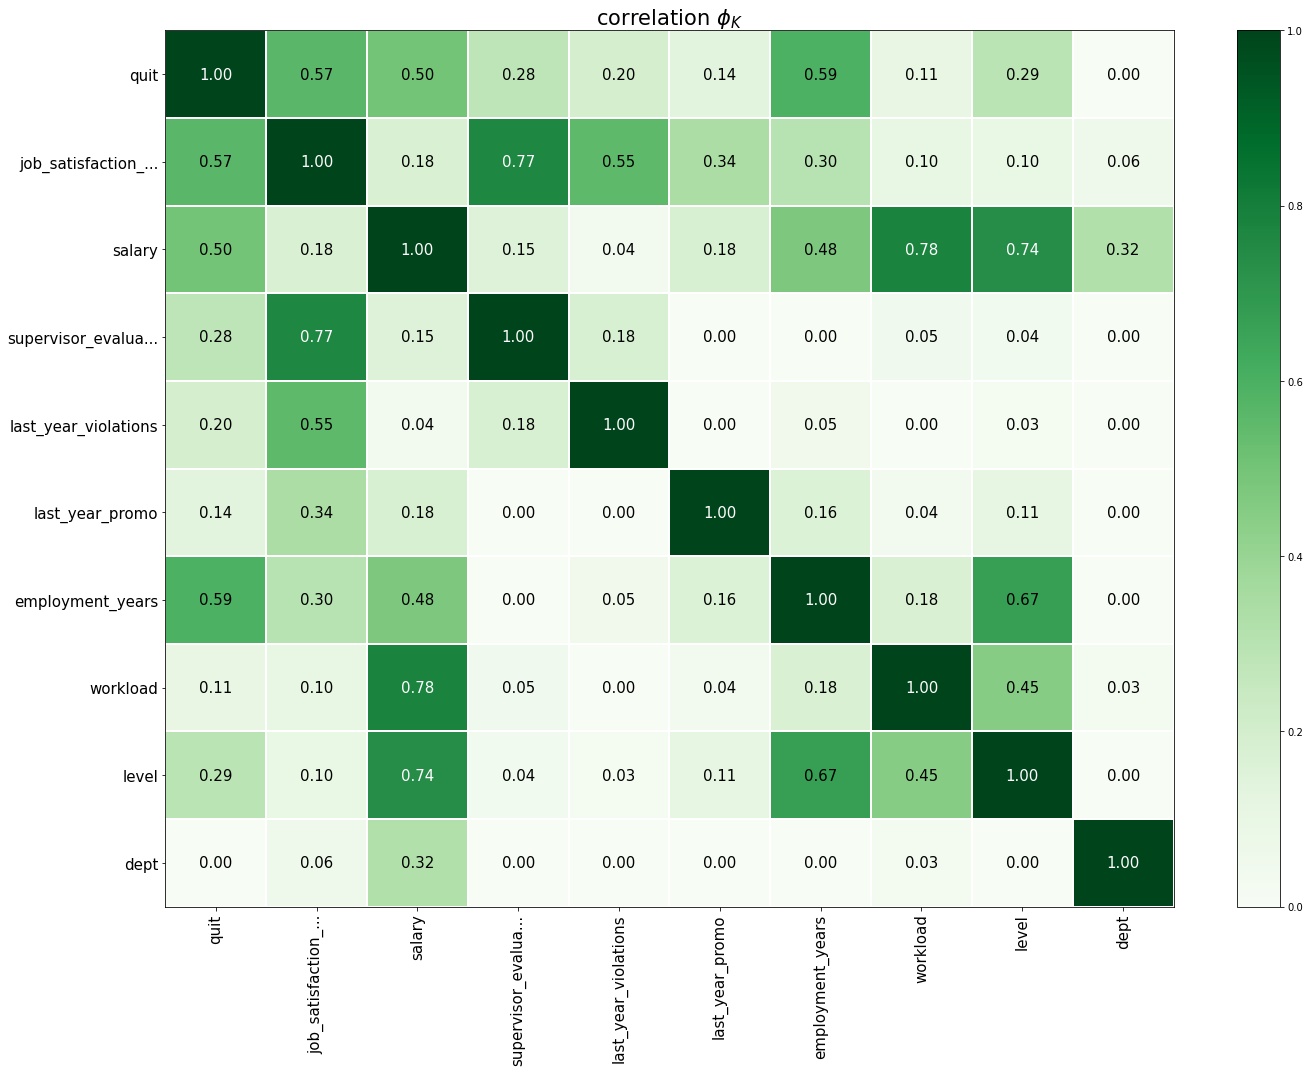

In [129]:
interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
phik_overview = test_data_analys.phik_matrix(interval_cols=interval_cols)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

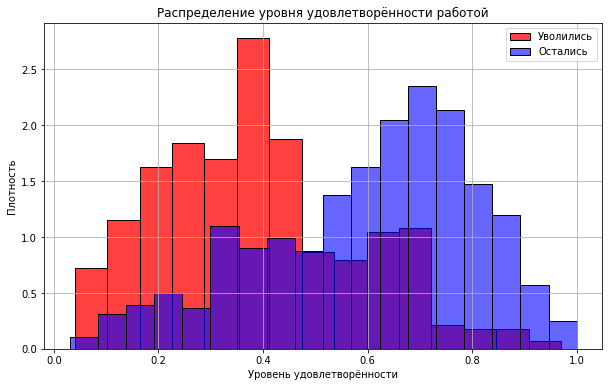

In [130]:
# –†–∞–∑–¥–µ–ª—è–µ–º –Ω–∞ –≥—Ä—É–ø–ø—ã
quit_yes = test_data_analys[test_data_analys['quit'] == 'yes']
quit_no = test_data_analys[test_data_analys['quit'] == 'no']

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(10, 6))
sns.histplot(quit_yes['job_satisfaction_rate'], label='–£–≤–æ–ª–∏–ª–∏—Å—å', color='red', stat='density', common_norm=False)
sns.histplot(quit_no['job_satisfaction_rate'], label='–û—Å—Ç–∞–ª–∏—Å—å', color='blue', alpha=0.6, stat='density', common_norm=False)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π')
plt.xlabel('–£—Ä–æ–≤–µ–Ω—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏')
plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
plt.legend()
plt.grid()
plt.show()

##### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç

+ H‚ÇÄ: –ù–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º

+ H‚ÇÅ: –ï—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º

–î–∏—Å–∫—Ä–µ—Ç–∏–∑–∏—Ä—É–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `'job_satisfaction_rate'`

In [131]:
test_data_analys['job_rate_dis'] = test_data_analys['job_satisfaction_rate'].apply(
    lambda x: 'high' if x >= 0.7 else ('medium' if 0.4 <= x < 0.7 else 'low')
)
test_data_analys.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
429973  purchasing  middle   medium                 6              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
429973                   no                      3   42000   

        job_satisfaction_rate quit job_rate_dis  
id                                               
485046                   0.79   no         high  
467458                   0.64   no       medium  
418655                   0.60   no       medium  
789145                   0.75   no         high  
429973                   0.67  yes       medium

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `–ö—Ä–∏—Ç–µ—Ä–∏–π —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤`

In [132]:
# —Ç–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å–∏
contingency_table = pd.crosstab(test_data_analys['job_rate_dis'], test_data_analys['quit'])
contingency_table

quit           no  yes
job_rate_dis          
high          486   23
low           238  245
medium        546  179

In [133]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [134]:
alpha = 0.05 
if p_value < alpha:
    print(f"–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –º–µ–Ω—å—à–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É —Ç.–∫. –Ω–∞–±–ª—é–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–µ –ø–æ–ø–∞–ª–æ –≤ –æ–±–ª–∞—Å—Ç—å –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Ç–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ {alpha} –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ, —Ç–æ –µ—Å—Ç—å –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω–∏–º–∞–µ–º –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –æ —Ç–æ–º, —á—Ç–æ –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º")
else:
    print(f"–¢.–∫. –Ω–∞–±–ª—é–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ–ø–∞–ª–æ –≤ –æ–±–ª–∞—Å—Ç—å –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Ç–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ {alpha} –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∞—Ç –æ—Å–Ω–æ–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ, —Ç.–µ. –º—ã –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º  –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –Ω–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º")

–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –º–µ–Ω—å—à–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É —Ç.–∫. –Ω–∞–±–ª—é–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–µ –ø–æ–ø–∞–ª–æ –≤ –æ–±–ª–∞—Å—Ç—å –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Ç–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05 –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ, —Ç–æ –µ—Å—Ç—å –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω–∏–º–∞–µ–º –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –æ —Ç–æ–º, —á—Ç–æ –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º


##### –í—ã–≤–æ–¥

+ –ò–∑ –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `quit` –∏ `'job_satisfaction_rate'` –∏–º–µ—é—Ç —Å—Ä–µ–¥–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ 0.61

+ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ —É–≤–æ–ª–∏–≤—à–∏–µ—Å—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –±—ã–ª–∏ –º–µ–Ω—å—à–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω—ã —Ä–∞–±–æ—Ç–æ–π

–ê –∑–Ω–∞—á–∏—Ç –∫–∞–∫–∞—è-—Ç–æ —Å–≤—è–∑—å —É —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ—Å—Ç—å –∏ –±–ª–∞–≥–æ–¥–∞—Ä—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–º—É —Ç–µ—Å—Ç—É —É –Ω–∞—Å –µ—Å—Ç—å –æ—Å–Ω–æ–≤–∞–Ω–∏—è –ø–æ–ª–∞–≥–∞—Ç—å, —á—Ç–æ –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏–µ–º

### –®–∞–≥ 4. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∑–∞–¥–∞—á–∏ - `model_1`

–° –ø–æ–º–æ—â—å—é –Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∂–µ–º `'job_satisfaction_rate'` –¥–ª—è 2 –∑–∞–¥–∞—á–∏

In [135]:
job_rate_train = model_1.predict(train_data_quit.drop('quit', axis = 1))
job_rate_test = model_1.predict(test_data_quit.drop('quit', axis = 1))
job_rate_train

array([0.62      , 0.85352941, 0.3325    , ..., 0.5175    , 0.55333333,
       0.515     ])

In [136]:
train_data_quit['predicted_job_satisfaction_rate'] = job_rate_train
test_data_quit['predicted_job_satisfaction_rate']= job_rate_test
display(train_data_quit.head())
test_data_quit.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  \
id                                                                
723290                   no                      4   54000   no   
814010                   no                      4   27600   no   
155091                   no                      1   37200   no   
257132                  yes                      3   24000  yes   
910140                   no                      5   25200   no   

        predicted_job_satisfaction_rate  
id                                       
723290                         0.620000  
814010                         0.853529  
155091                         0.332500  
257132                         0.358750  
910140                         0.791667

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary quit  \
id                                                                
485046                   no                      5   28800   no   
686555                   no                      4   30000   no   
467458                   no                      4   19200   no   
418655                   no                      4   19200   no   
789145                   no                      5   40800   no   

        predicted_job_satisfaction_rate  
id                                       
485046                         0.860000  
686555                         0.680000  
467458                         0.690000  
418655                         0.713333  
789145                         0.710952

### –®–∞–≥ 5. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [137]:
X_train = train_data_quit.drop('quit', axis=1)
X_test = test_data_quit.drop('quit', axis=1)
y_train = train_data_quit['quit']
y_test = test_data_quit['quit']

In [138]:
#–∑–∞–∫–æ–¥–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test) 
label_encoder.classes_

array(['no', 'yes'], dtype=object)

—Ç.–∫ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ—ã–π –≤—ã–±–æ—Ä–∫–µ –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤, —Ç–æ –ø—Ä–∏–º–µ–Ω–∏–º oversampling

In [139]:
class_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
print(class_mapping)

{'no': 0, 'yes': 1}


In [140]:
ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", 'workload']
num_columns = ["employment_years", "supervisor_evaluation", "salary", 'predicted_job_satisfaction_rate']

In [141]:
# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ ohe_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ OHE-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first'))
    ]
    )

# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ ord_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ Ordinal-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# —Å–æ–∑–¥–∞—ë–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ num_columns: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ —Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
# SimpleImputer + Scaler
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler())
    ]
    )

# —Å–æ–∑–¥–∞—ë–º –æ–±—â–∏–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [142]:
# —Å–æ–∑–¥–∞—ë–º –∏—Ç–æ–≥–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –¥–µ—Ä–µ–≤–∞
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### –®–∞–≥ 6. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [143]:
# —Å–æ–∑–¥–∞—ë–º –∏—Ç–æ–≥–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –¥–µ—Ä–µ–≤–∞
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [144]:
param_grid = [
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 12),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()]  
    },

    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l2'
        )],
        'models__C': range(10, 12),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [145]:
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 40
)
randomized_search_1.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()]},
                                        {'models': [LogisticRegression(random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(10, 12),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [146]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search_1.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π:', randomized_search_1.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
         

In [147]:
model_2_1 = randomized_search_1.best_estimator_
y_pred_probas = model_2_1.predict_proba(X_test)[:, 1]
print(f"AUC-ROC = {round(roc_auc_score(y_test, y_pred_probas),2)}")

AUC-ROC = 0.92


–ü—Ä–æ–≤–µ—Ä–∏–º, –º–æ–∂–Ω–æ –ª–∏ —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å

–ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

<AxesSubplot:ylabel='Feature'>

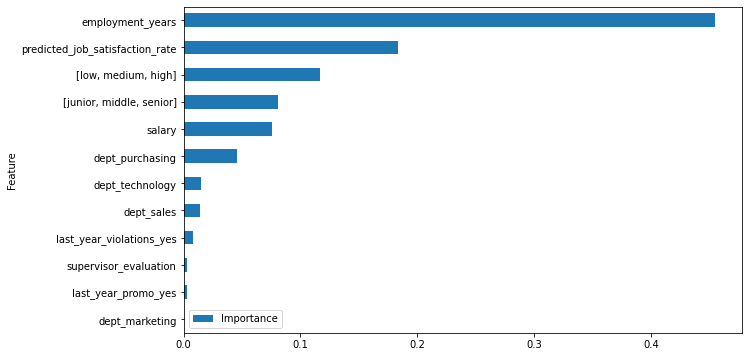

In [148]:
if isinstance(model_2_1.named_steps['models'], LogisticRegression):
    importances = model_2_1.named_steps['models'].coef_[0]
else:
    importances = model_2_1.named_steps['models'].feature_importances_

# –ü–æ–ª—É—á–∞–µ–º –∏–º–µ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
# –î–ª—è OHE
ohe_columns_new = model_2_1.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names_out(ohe_columns)
# –î–ª—è Ordinal Encoding
ord_columns_new = model_2_1.named_steps['preprocessor'].transformers_[1][1].named_steps['ord'].categories_
num_columns_new = num_columns
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
all_features = list(ohe_columns_new) + list(ord_columns_new) + list(num_columns_new)

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True) 
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

–î–æ–±–∞–≤–∏–º –æ—Ç–±–æ—Ä k –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏ –ø–æ–º–æ—â–∏ SelectKBest

In [149]:
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('selector', SelectKBest(mutual_info_classif, k=6)),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [150]:
param_grid = [
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 12),
        'models__min_samples_split': range(2, 6),
        'models__min_samples_leaf': range(1, 6), 
        'selector__k': range(6, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]    

In [151]:
randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 40
)
randomized_search_2.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                   param_distributions=[{'models': [DecisionTreeClassifier(max_depth=5,
                                                                           min_samples_leaf=2,
                                                                           min_samples_split=3,
                                                                           random_state=42)],
                                         'models__max_depth': range(5, 12),
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough'],
                                         'selector__k': range(6, 10)}],
                   random_state=42, scoring='roc_auc')

In [152]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search_2.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π:', randomized_search_2.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
         

In [153]:
model_2_2 = randomized_search_2.best_estimator_
y_pred_probas = model_2_2.predict_proba(X_test)[:, 1]
print(f"AUC-ROC = {round(roc_auc_score(y_test, y_pred_probas),2)}")

AUC-ROC = 0.93


#### –í—ã–≤–æ–¥

+ –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å `DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=3, random_state=42))`
+ SelectKBest(k=6,score_func=mutual_info_classif)
+ AUC-ROC = 0.91

## –≠—Ç–∞–ø 3: –û–±—â–∏–π –≤—ã–≤–æ–¥

**–ó–∞–¥–∞—á–∞ 1. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É—Ä–æ–≤–Ω—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞**

1. **–ó–∞–¥–∞—á–∞** –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å–º–æ–∂–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —É—Ä–æ–≤–µ–Ω—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑—á–∏–∫–∞

2. –í –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∞–ª–∏—Å—å –æ—à–∏–±–∫–∏ 
    + –ë—ã–ª–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –æ—à–∏–±–∫–∏ –≤ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö
    + –£–¥–∞–ª–µ–Ω—ã –¥—É–±–ª–∏–∫–∞—Ç—ã
3. –î–ª—è –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –±—ã–ª —Å–æ–±—Ä–∞–Ω –ø–∞–π–ø–ª–∞–π–Ω, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö, –∞ —Ç–∞–∫–∂–µ —Å–∞–º–æ –æ–±—É—á–µ–Ω–∏–µ, –¥–∞–ª–µ–µ –∑–∞–ø—É—â–µ–Ω —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ–∏—Å–∫ —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ 2 –º–æ–¥–µ–ª–µ–π: 
    + DecisionTreeRegressor
    + LinearRegression()
    
–î–ª—è –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –ø–æ–ª–∏–Ω–æ–º–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏ –æ—Ç–±–æ—Ä –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–æ–∫–≤  

4. –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=4, random_state=42) c SMAPE = 14.54835138127017

5. –°–∞–º—ã–º–∏ –≤–∞–∂–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –æ–∫–∞–∑–∞–ª–∏—Å—å `supervisor_evaluation` `emplyment_years`, `salary` –∏ `last_year_violations`

6. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞:
+ **–§–æ–∫—É—Å –Ω–∞ —Ä–∞–∑–≤–∏—Ç–∏–∏ –∫—É–ª—å—Ç—É—Ä—ã –æ–±—Ä–∞—Ç–Ω–æ–π —Å–≤—è–∑–∏:**  
  –í–Ω–µ–¥—Ä–∏—Ç—å —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤—ã–µ –æ—Ü–µ–Ω–∫–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –∏ —á–µ—Å—Ç–Ω—ã–µ –æ–±—Å—É–∂–¥–µ–Ω–∏—è –∏—Ö —É—Å–ø–µ—Ö–æ–≤ –∏ –ø—Ä–æ–±–ª–µ–º. –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤—ã—Å–∏—Ç—å –æ–±—â–∏–π —É—Ä–æ–≤–µ–Ω—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏
+ **–ü—Ä–æ–≥—Ä–∞–º–º—ã –º–æ—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ —Å—Ç–∞–∂—É —Ä–∞–±–æ—Ç—ã:**  
  –†–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –±–æ–Ω—É—Å—ã –∏–ª–∏ –ø—Ä–∏–≤–∏–ª–µ–≥–∏–∏ –¥–ª—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ —Å –±–æ–ª–µ–µ –¥–ª–∏—Ç–µ–ª—å–Ω—ã–º —Å—Ç–∞–∂–µ–º
+ **–ü–æ–¥–¥–µ—Ä–∂–∞–Ω–∏–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ–π –æ–ø–ª–∞—Ç—ã —Ç—Ä—É–¥–∞:**  
  –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Ä—ã–Ω–∫—É, –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–∞
+ **–û–±—É—á–µ–Ω–∏–µ –∏ –ø–æ–¥–¥–µ—Ä–∂–∫–∞:**  
  –û—Ä–≥–∞–Ω–∏–∑—É–π—Ç–µ –ø—Ä–æ–≥—Ä–∞–º–º—ã –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∏ –Ω–∞—Ä—É—à–µ–Ω–∏–π –∏ —É–ª—É—á—à–∏—Ç–µ —Å–∏—Å—Ç–µ–º—É –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ –Ω–æ–≤—ã—Ö —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, —á—Ç–æ–±—ã –Ω –Ω–∞—Ä—É—à–µ–Ω–∏–π —Å—Ç–∞–Ω–æ–≤–∏–ª–æ—Å—å –º–µ–Ω—å—à–µ
 
**–ó–∞–¥–∞—á–∞ 2. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞**
1. **–ó–∞–¥–∞—á–∞** –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å–º–æ–∂–µ—Ç, –∫–æ—Ç–æ—Ä–∞—è —Å–º–æ–∂–µ—Ç –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑—á–∏–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Ç–æ, —á—Ç–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —É–≤–æ–ª–∏—Ç—Å—è –∏–∑ –∫–æ–º–ø–∞–Ω–∏–∏

2. –í –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∞–ª–∏—Å—å –æ—à–∏–±–∫–∏ 
    + –ë—ã–ª–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –æ—à–∏–±–∫–∏ –≤ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö
    + –£–¥–∞–ª–µ–Ω—ã –¥—É–±–ª–∏–∫–∞—Ç—ã
3. –î–ª—è –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –±—ã–ª —Å–æ–±—Ä–∞–Ω –ø–∞–π–ø–ª–∞–π–Ω, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö, –∞ —Ç–∞–∫–∂–µ —Å–∞–º–æ –æ–±—É—á–µ–Ω–∏–µ, –¥–∞–ª–µ–µ –∑–∞–ø—É—â–µ–Ω —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ–∏—Å–∫ —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ 3 –º–æ–¥–µ–ª–µ–π: 
    + DecisionTreeClassifier()
    + KNeighborsClassifier()
    + LogisticRegression()
    
–î–ª—è –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ªc—è –æ—Ç–±–æ—Ä –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–æ–∫–≤  

4. –õ—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å `DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42))`
+ SelectKBest(k=9,score_func=mutual_info_classif)
+ AUC-ROC = 0.92

5. –°–∞–º—ã–º–∏ –≤–∞–∂–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç–æ–π –æ–∫–∞–∑–∞–ª–∏—Å—å `level`	`workload`	`employment_years` `salary`	`predicted_job_satisfaction_rate`

6. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞:
- **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—á–µ–π –Ω–∞–≥—Ä—É–∑–∫–∏:**  
  –ü–µ—Ä–µ—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–∏—Ç—å –æ–±—è–∑–∞–Ω–Ω–æ—Å—Ç–∏, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–≥—Ä—É–∑–∫–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –Ω–∞—á–∞–ª—å–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö –∏—Ö —Ä–∞–±–æ—Ç—ã
- **–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏–π:**  
  –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–Ω–æ–≥–æ –º–æ–Ω–∏—Ç–æ—Ä–∏–Ω–≥–∞ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–∏—Å–∫–æ–≤ —É–≤–æ–ª—å–Ω–µ–Ω–∏–π. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –≤–æ–≤—Ä–µ–º—è –ø—Ä–∏–Ω–∏–º–∞—Ç—å –º–µ—Ä—ã –¥–ª—è —É–¥–µ—Ä–∂–∞–Ω–∏—è –∫–ª—é—á–µ–≤—ã—Ö —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤
- **–ü–æ–¥–¥–µ—Ä–∂–∫–∞ –Ω–∞ –Ω–∞—á–∞–ª—ã—Ö —ç—Ç–∞–ø–∞—Ö:**  
  –£–¥–µ–ª—è—Ç—å –±–æ–ª—å—à–µ –≤–Ω–∏–º–∞–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞–º –≤ –ø–µ—Ä–≤—ã–µ –≥–æ–¥—ã —Ä–∞–±–æ—Ç—ã, —Ç–∞–∫ –∫–∞–∫ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É–≤–æ–ª—å–Ω–µ–Ω–∏—è –≤ —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è

- **–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –æ—Ç–¥–µ–ª 'technology', —á—Ç–æ–±—ã —É–∑–Ω–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —É–≤–æ–ª—å–Ω–µ–Ω–∏–π**  

**–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞:**
1. **–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è HR-–∞–Ω–∞–ª–∏—Ç–∏–∫–∏:**  
   –í–Ω–µ–¥—Ä–∏—Ç—å —Å–∏—Å—Ç–µ–º—É –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–Ω–∏—Ç–æ—Ä–∏–Ω–≥–∞ –∫–ª—é—á–µ–≤—ã—Ö HR-–º–µ—Ç—Ä–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω–æ –≤—ã—è–≤–ª—è—Ç—å –∑–æ–Ω—ã —Ä–∏—Å–∫–∞

2. **–°–æ–∑–¥–∞–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã —Ä–∞–Ω–Ω–µ–≥–æ –æ–ø–æ–≤–µ—â–µ–Ω–∏—è:**  
   –ù–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–æ–≥–Ω–æ–∑–∞ —É–≤–æ–ª—å–Ω–µ–Ω–∏–π —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å —Å–∏—Å—Ç–µ–º—É –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π –¥–ª—è —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª–µ–π, —á—Ç–æ–±—ã –æ–Ω–∏ –º–æ–≥–ª–∏ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ —Ä–µ–∞–≥–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è.

**–ó–∞–∫–ª—é—á–µ–Ω–∏–µ:**
–ü–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –ø–æ–º–æ–≥—É—Ç –∫–æ–º–ø–∞–Ω–∏–∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —É–ø—Ä–∞–≤–ª—è—Ç—å —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç—å—é —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –∏ —Å–Ω–∏–∑–∏—Ç—å —É—Ä–æ–≤–µ–Ω—å —É–≤–æ–ª—å–Ω–µ–Ω–∏–π